
# <br> <br> <b> Rynek nieruchmości w Polsce w latach 2015 - 2018 </b><br>
___

> Anna Czarnowska <br>
> Dorota Przystaś <br>
> BIG DATA. Inżynieria danych, gr 2 <br> <br>

> [źródła danych: GUS] (https://stat.gov.pl/index.php)

___


In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
# tables with data
%run loader_data.ipynb

Data loading finished


##### <i> porządkowanie danych, poprawa błędów </i> <br> <br> 

In [3]:
# delete columns that will not be used
def drop_kod_and_2019_and_2020(data_frame):
    data_frame = data_frame.drop('Kod', 1)
    data_frame.drop(data_frame.columns[data_frame.columns.str.contains('2019')], axis=1, inplace=True)
    data_frame.drop(data_frame.columns[data_frame.columns.str.contains('2020')], axis=1, inplace=True)
    return data_frame

unemp_rate = drop_kod_and_2019_and_2020(unemp_rate)
popul = drop_kod_and_2019_and_2020(popul)
aver_salary = drop_kod_and_2019_and_2020(aver_salary)
inflation_rate = drop_kod_and_2019_and_2020(inflation_rate)
prices = drop_kod_and_2019_and_2020(prices)
prices_new = drop_kod_and_2019_and_2020(prices_new)
prices_old = drop_kod_and_2019_and_2020(prices_old)
prices_quarters = drop_kod_and_2019_and_2020(prices_quarters)
sold = drop_kod_and_2019_and_2020(sold)
sold_new = drop_kod_and_2019_and_2020(sold_new)
sold_old = drop_kod_and_2019_and_2020(sold_old)
sold_quarters = drop_kod_and_2019_and_2020(sold_quarters)
prices_m2 = drop_kod_and_2019_and_2020(prices_m2)
prices_m2_new = drop_kod_and_2019_and_2020(prices_m2_new)
prices_m2_old = drop_kod_and_2019_and_2020(prices_m2_old)
prices_m2_quarters = drop_kod_and_2019_and_2020(prices_m2_quarters)

In [4]:
# there is a mistake in unit in sold flats - instead of amount is 'zł'
sold = sold.replace('[zł]', '[ilosc]')
sold_new = sold_new.replace('[zł]', '[ilosc]')
sold_old = sold_old.replace('[zł]', '[ilosc]')
sold_quarters = sold_quarters.replace('[zł]', '[ilosc]')

#### <i> Wyodbrębnienie danych dla Polski </i> <br> <br> 

In [5]:
# separate data for poland only
def find_poland_drop_index(data_frame):
    data_frame = data_frame.head(2)
    data_frame = data_frame.drop(data_frame.index[0])
    return data_frame
    
unemp_rate_pl = find_poland_drop_index(unemp_rate)
aver_salary_pl = find_poland_drop_index(aver_salary)
popul_pl = find_poland_drop_index(popul)
inflation_rate_pl = find_poland_drop_index(inflation_rate)
prices_pl = find_poland_drop_index(prices)
prices_new_pl = find_poland_drop_index(prices_new)
prices_old_pl = find_poland_drop_index(prices_old)
prices_quarters_pl = find_poland_drop_index(prices_quarters)
sold_pl = find_poland_drop_index(sold)
sold_new_pl = find_poland_drop_index(sold_new)
sold_old_pl = find_poland_drop_index(sold_old)
sold_quarters_pl = find_poland_drop_index(sold_quarters)
prices_m2_pl =  find_poland_drop_index(prices_m2)
prices_m2_new_pl = find_poland_drop_index(prices_m2_new)
prices_m2_old_pl = find_poland_drop_index(prices_m2_old)
prices_m2_quarters_pl = find_poland_drop_index(prices_m2_quarters)

#### <i> Wyodrębnienie danych dla województw </i> <br> <br> 

In [6]:
# filter provinces
def drop_nazwa_and_index(data_frame):
    data_frame = data_frame[data_frame['Nazwa'].str.match('^.*[A-Z]$')]
    data_frame = data_frame.drop(data_frame.index[0])
    data_frame = data_frame.reset_index(drop=True)
    return data_frame

unemp_rate = drop_nazwa_and_index(unemp_rate)
aver_salary = drop_nazwa_and_index(aver_salary)
inflation_rate = drop_nazwa_and_index(inflation_rate)
popul_prov = drop_nazwa_and_index(popul)
prices_prov = drop_nazwa_and_index(prices)
prices_new_prov = drop_nazwa_and_index(prices_new)
prices_old_prov = drop_nazwa_and_index(prices_old)
prices_quarters_prov = drop_nazwa_and_index(prices_quarters)
sold_prov = drop_nazwa_and_index(sold)
sold_new_prov = drop_nazwa_and_index(sold_new)
sold_old_prov = drop_nazwa_and_index(sold_old)
sold_quarters_prov = drop_nazwa_and_index(sold_quarters)
prices_m2_prov = drop_nazwa_and_index(prices_m2)
prices_m2_new_prov = drop_nazwa_and_index(prices_m2_new)
prices_m2_old_prov = drop_nazwa_and_index(prices_m2_old)
prices_m2_quarters_prov = drop_nazwa_and_index(prices_m2_quarters)

#### <i> Wyszczególnienie 10 miast z największą ilością mieszkańców </i> <br> <br> 

In [7]:
## top 10 cities in Poland by population 
# it is not possible to use cities as they are not in other tables
top10_cities = popul[(popul['Nazwa'].str.contains('m\.'))]
top10_cities = top10_cities.sort_values(by=['2018'], ascending = False)
top10_cities = top10_cities.head(10)
top10_cities = top10_cities.reset_index(drop=True)
top10_cities.head(10)

,Nazwa,2015,2016,2017,2018
0,Powiat m. st. Warszawa,1744351,1753977,1764615,1777972
1,Powiat m.Kraków,761069,765320,767348,771069
2,Powiat m.Łódź,700982,696503,690422,685285
3,Powiat m.Wrocław,635759,637683,638586,640648
4,Powiat m.Poznań,542348,540372,538633,536438
5,Powiat m.Gdańsk,462249,463754,464254,466631
6,Powiat m.Szczecin,405657,404878,403883,402465
7,Powiat m.Bydgoszcz,355645,353938,352313,350178
8,Powiat m.Lublin,340727,340466,339850,339682
9,Powiat m.Białystok,295981,296628,297288,297459


### <i> Jak kształtuje się cena za 1m2 oraz średnia cena sprzedaży w tych miastach? </i> <br> <br> 

In [8]:
# filter for top 10 cities prices flats per 1m2
top10_cities = top10_cities[('Nazwa')]
top10city_prices_m2 = prices_m2[prices_m2.Nazwa.isin(top10_cities)]
top10city_prices_m2 = top10city_prices_m2.sort_values(by=['2018 ogółem'], ascending = False)
top10city_prices_m2 = top10city_prices_m2.reset_index(drop=True)
top10city_prices_m2.head(10)

,Nazwa,2015 ogółem,2016 ogółem,2017 ogółem,2018 ogółem,2015 do 40m2,2016 do 40m2,2017 do 40m2,2018 do 40m2,"2015 40,1-60m2",...,"2017 40,1-60m2","2018 40,1-60m2","2015 60,1-80m2","2016 60,1-80m2","2017 60,1-80m2","2018 60,1-80m2",2015 od 80m2,2016 od 80m2,2017 od 80m2,2018 od 80m2
0,Powiat m. st. Warszawa,7667.5,7771.5,8202.5,8779,7594,7681.25,8209,8819.5,7363.25,...,7933,8262.25,7459.5,7516,7851.25,8264.5,8415.5,8837,9123.5,9985.5
1,Powiat m.Gdańsk,5493.5,5836.25,6520.75,6859.25,5374,5746.25,6587.25,6990.25,5488.75,...,6437.75,6795.5,5446.25,5775,6313.75,6788.75,5709.25,6423.75,6992.75,7079
2,Powiat m.Kraków,6489.25,6446.75,6594,6769.25,6409,6482.25,6864.75,7219,6331.5,...,6405.75,6603.75,6385.75,6447.25,6493.75,6502.25,7301,7074.75,7023,7146
3,Powiat m.Poznań,5525,5594,5813.5,6152.75,5681.25,5831.25,6215.25,6508.5,5693.25,...,6015,6287.5,5497.5,5493.75,5668,6066,4886.75,5013.75,5076.25,5544
4,Powiat m.Wrocław,5266,5445,5548.75,5879.5,5568.25,5969.25,6145.25,6635.75,5316,...,5578.75,5973.25,5099.5,5280.25,5497.5,5639.5,5164,5232,5096.75,5533.25
5,Powiat m.Lublin,4743.25,4962,5043.5,5277.25,4710.5,4860,5000,5475.75,4782.25,...,5084.25,5273.75,4691.25,5032.75,4990.75,5197.25,4742.75,4957.25,5057.5,5301
6,Powiat m.Szczecin,4159.25,4251.25,4452.25,4848.5,4351.75,4487.75,4617.75,5126.25,4224.5,...,4601.25,4992.75,4233.25,4349.25,4492.75,4891.25,3828.5,3739.5,3941,4350.5
7,Powiat m.Białystok,4371.75,4374.25,4496.25,4721.5,4399.5,4384,4499.25,5015.5,4426.5,...,4510.25,4710.75,4297.25,4382.75,4481.25,4589.5,4106,4126.5,4378.75,4605.5
8,Powiat m.Bydgoszcz,3824,3967.25,4182.75,4586,3809,4019.25,4261.25,4676.75,3874.25,...,4269.25,4600,3805,4038.25,4144,4646.25,3657,3453.5,3893.5,4342.5
9,Powiat m.Łódź,3736.5,3804,4097,4456.5,3254,3411.5,3841.75,4264.5,3689.75,...,4063.5,4398,4163.25,4182.25,4394.5,4751.5,3748,3768,3974.5,4319


In [9]:
# filter for top 10 cities average prices flats 
top10city_prices = prices[prices.Nazwa.isin(top10_cities)]
top10city_prices = top10city_prices.sort_values(by=['2018 ogółem'], ascending = False)
top10city_prices = top10city_prices.reset_index(drop=True)
top10city_prices.head(10)

,Nazwa,2015 ogółem,2016 ogółem,2017 ogółem,2018 ogółem,2015 do 40m2,2016 do 40m2,2017 do 40m2,2018 do 40m2,"2015 40,1-60m2",...,"2017 40,1-60m2","2018 40,1-60m2","2015 60,1-80m2","2016 60,1-80m2","2017 60,1-80m2","2018 60,1-80m2",2015 od 80m2,2016 od 80m2,2017 od 80m2,2018 od 80m2
0,Powiat m. st. Warszawa,434152,432812,453971,498214,251455,255845,271569,289007,365165,...,389151,408800,510248,513961,536755,567227,915629,975361,987633,1069940
1,Powiat m.Gdańsk,291544,306104,352962,361493,178634,193754,223633,240920,269217,...,316352,332357,369109,393276,427994,459275,570664,639118,729219,705901
2,Powiat m.Kraków,331414,331789,328325,336488,211138,212528,217025,232739,314791,...,310883,320400,436140,432292,436131,432579,758611,719948,711717,721883
3,Powiat m.Wrocław,287731,299653,304800,328678,185329,197500,203803,220935,264663,...,279173,298873,343570,355387,371931,378783,529620,532677,517192,554235
4,Powiat m.Poznań,289239,293399,306259,328466,188687,193345,207301,221297,282674,...,293253,310389,373505,370300,379547,409405,500090,515407,540861,576786
5,Powiat m.Lublin,255855,265093,262459,281751,154984,162755,162030,183130,238798,...,254136,263913,317888,338200,329915,345642,482002,523510,501150,511706
6,Powiat m.Szczecin,229938,233906,244882,267813,142065,147110,151155,168439,209624,...,228811,244229,289033,301770,306725,332810,397654,378899,400364,443065
7,Powiat m.Białystok,217843,217816,231436,238171,148572,146834,151275,168345,218120,...,221717,233455,285117,286266,299251,302165,411069,409506,427989,445578
8,Powiat m.Bydgoszcz,198745,213342,214841,234728,126989,132966,136979,148627,193203,...,210919,225412,257913,276631,277161,313754,354273,356483,387561,436079
9,Powiat m.Łódź,194735,190844,208455,233053,104298,110005,124271,136181,180967,...,199083,216587,282376,282918,298844,324251,378600,379928,396363,435308


#### <b> Dostrzegalna jest zależność - w miastach z wyższą liczbą ludności ceny mieszkań są stosunkowo wyższe. </b> 
Wyjątkami są miasta:
* Gdańsk 
    * w tabeli z cenami sprzedaży Gdańsk zajmuje 2 miejsce, podczas gdy pod względem zaludnienia rozpoczyna drugą połowę tabeli
    * nadmorska, atrakcyjna lokalizacja podbija cenę
* Łódź
    * mimo wysokiej liczby mieszkańców, ceny sprzedaży mieszkań są najniższe z całej dziesiątki
    * mało atrakcyjne pod względem inwestycji oraz miejsc pracy miasto

In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

#### <i> Liczba ludności w poszczególnych województwach w Polsce </i> <br> <br> 

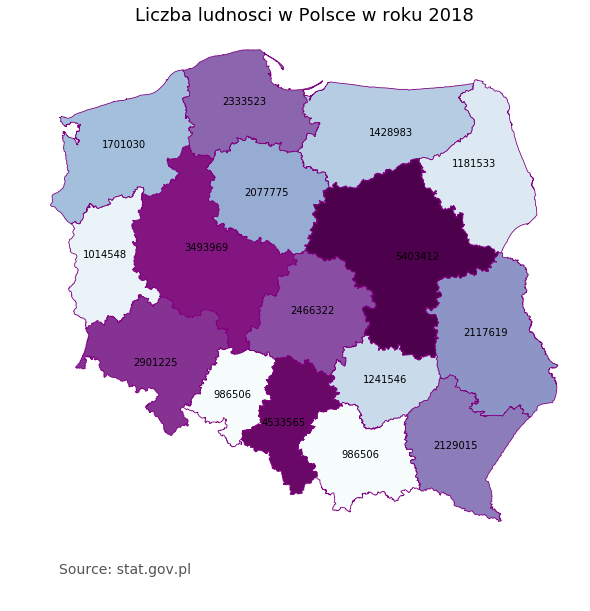

In [11]:
# population - map
popul_map = popul_prov[['Nazwa', '2018']]
popul_map = popul_map.rename(columns = {'2018' : 'population'})

poland_data = gpd.read_file(r'D:\\Studia\Projekt\maps\Poland_Polygon.shp')
poland_data = poland_data[['locname', 'geometry']]

poland_data['Nazwa'] = ['WIELKOPOLSKIE', 'KUJAWSKO-POMORSKIE', 'OPOLSKIE', 'ŁÓDZKIE', 'DOLNOŚLĄSKIE', 'LUBELSKIE', 
                       'LUBUSKIE', 'MAZOWIECKIE', 'OPOLSKIE', 'PODLASKIE', 'POMORSKIE', 'ŚLĄSKIE', 'PODKARPACKIE',
                       'ŚWIĘTOKRZYSKIE', 'WARMIŃSKO-MAZURSKIE', 'ZACHODNIOPOMORSKIE']

combined_data_perm4 = poland_data.merge(popul_map, on = 'Nazwa')
combined_data_perm4 = combined_data_perm4[['Nazwa', 'geometry', 'population']]

combined_data_perm4 = combined_data_perm4.to_crs(epsg=2180)
fig, ax = plt.subplots(1, figsize = (10,10))

ax.annotate('Source: stat.gov.pl',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=14 ,color='#555555')

title = 'Liczba ludnosci w Polsce w roku 2018'
ax.set_title(title, fontdict={'fontsize': '18', 'fontweight' : '6'})

combined_data_perm4.plot(cmap = 'BuPu', column = 'population', ax = ax, linewidth=0.8, edgecolor='purple', 
                         figsize = (10,10))
ax.axis('off') 

combined_data_perm4['coords'] = combined_data_perm4['geometry'].apply(lambda x: x.representative_point().coords[:])
combined_data_perm4['coords'] = [coords[0] for coords in combined_data_perm4['coords']]
for idx, row in combined_data_perm4.iterrows():
    plt.annotate(s=row['population'], xy=row['coords'],horizontalalignment='center')


### <i> Jak kształtuje się cena za 1m2 oraz średnia cena sprzedaży w województwach względem liczby ludności? </i> <br> <br> 

In [12]:
# filter for provinces prices flats per 1m2
prices_m2_prov = prices_m2_prov.sort_values(by=['2018 ogółem'], ascending = False)
prices_m2_prov = prices_m2_prov.reset_index(drop=True)
prices_m2_prov 

,Nazwa,2015 ogółem,2016 ogółem,2017 ogółem,2018 ogółem,2015 do 40m2,2016 do 40m2,2017 do 40m2,2018 do 40m2,"2015 40,1-60m2",...,"2017 40,1-60m2","2018 40,1-60m2","2015 60,1-80m2","2016 60,1-80m2","2017 60,1-80m2","2018 60,1-80m2",2015 od 80m2,2016 od 80m2,2017 od 80m2,2018 od 80m2
0,MAZOWIECKIE,6656.75,6708.5,6780.25,7250.5,6637.75,6664.75,6831.25,7404.5,6385.75,...,6586,6782.75,6475.5,6526.75,6547.25,6922,7307,7283,7397.25,8216.25
1,MAŁOPOLSKIE,5888,5788,5733.25,6008.5,5963.5,5951,6026,6605.5,5745.25,...,5660.25,5963.75,5732.75,5633.75,5531,5618.5,6524.75,6252.25,5921.75,6063.25
2,POMORSKIE,4861,5058,5525.5,5686.5,4717,5022,5610,5923.5,4808.25,...,5474,5719.25,4810.75,4967,5362,5532.25,5254.25,5458.25,5832.25,5668.25
3,LUBELSKIE,3963.25,4171,4239.5,4565,3790.5,4031.5,4116.75,4536,3982.75,...,4282,4547,3893.5,4175.5,4199.25,4582.5,4301.75,4420.5,4296.75,4621.5
4,WIELKOPOLSKIE,4190,4257,4365,4553,4600.5,4627.75,4831,5058.75,4333.25,...,4512,4745.5,4085,4133,4174.25,4405.25,3690,3767.5,3854,4065.75
5,DOLNOŚLĄSKIE,4136.5,4256.75,4247.5,4467.25,4117,4301.25,4479.25,4669.75,4279.25,...,4375.75,4622.5,4097.25,4169.5,4225,4409,3863.5,4045,3799.25,4076.5
6,ZACHODNIOPOMORSKIE,3481.75,3704.75,3859.75,4356.25,3745.75,3971.5,4179,5038.25,3562.25,...,4004.25,4451.5,3310.25,3564.75,3711.75,3980.25,3287.75,3457.25,3417,4050
7,PODLASKIE,3913.75,3969.75,4066.75,4197.75,3932,3983,3989.5,4386.5,3990.25,...,4077.5,4242,3794,3954.75,4068.25,4055,3744.75,3734.25,4115.25,4032.25
8,ŁÓDZKIE,3419,3487.5,3669,4047.5,3031.25,3168.75,3454,3862.75,3368,...,3618.75,3975.25,3644.75,3677.25,3880.75,4257.25,3646.75,3590.25,3718.75,4094.5
9,PODKARPACKIE,3650,3302.5,3442.5,3907.75,3824.75,3434,3454.5,4183.5,3796,...,3580.25,3941.75,3451.75,3170.5,3330.75,3825.5,3039.5,2578,2844,3395


In [13]:
# filter for province cities average prices flats 
prices_prov = prices_prov.sort_values(by=['2018 ogółem'], ascending = False)
prices_prov = prices_prov.reset_index(drop=True)
prices_prov 

,Nazwa,2015 ogółem,2016 ogółem,2017 ogółem,2018 ogółem,2015 do 40m2,2016 do 40m2,2017 do 40m2,2018 do 40m2,"2015 40,1-60m2",...,"2017 40,1-60m2","2018 40,1-60m2","2015 60,1-80m2","2016 60,1-80m2","2017 60,1-80m2","2018 60,1-80m2",2015 od 80m2,2016 od 80m2,2017 od 80m2,2018 od 80m2
0,MAZOWIECKIE,377121,377582,381971,412259,221460,223104,230314,244881,317148,...,329094,336404,441736,445150,450871,473264,804060,810558,814223,890303
1,POMORSKIE,261035,271972,304680,312657,156142,168843,187496,200875,237312,...,269209,282475,327477,338032,365281,376990,527231,556069,598509,575077
2,MAŁOPOLSKIE,301659,301001,297864,307653,196500,195828,198538,214541,285662,...,283501,293409,389353,379782,378480,377195,672337,633401,606527,619387
3,WIELKOPOLSKIE,231585,232226,235694,256965,153510,154742,161429,171472,217134,...,221797,235307,279072,280282,281603,300088,375526,389257,398126,411327
4,DOLNOŚLĄSKIE,226067,234486,233603,248842,135722,142311,148265,153758,212747,...,218727,230803,276588,282679,285824,297913,396097,410735,390956,415711
5,LUBELSKIE,209517,221283,220761,241103,125620,135697,136524,152571,200501,...,215282,228243,262491,280479,280170,305040,432753,464322,422063,447750
6,ZACHODNIOPOMORSKIE,186900,199147,206892,233181,121614,128575,135022,166395,176797,...,197918,219411,227025,244973,253906,270962,335809,351976,343624,413676
7,PODLASKIE,197780,201817,208334,216141,133503,134070,133595,147802,197441,...,202080,211113,251702,259555,271113,265917,376776,380669,396791,394234
8,ŁÓDZKIE,176892,175731,186899,208999,98649,103207,113273,125346,166242,...,178276,196983,245709,245994,261769,287805,366896,361102,366841,409647
9,PODKARPACKIE,188060,168288,178464,204488,128831,114050,115984,141378,191498,...,181079,199100,231745,215446,224322,256984,294109,258194,284001,341862


#### <b> Możemy zauważyć podobną zależność, jak w przypadku topowych miast - w województwach z wyższą liczbą ludności ceny mieszkań są stosunkowo wyższe. </b> 
Wyjątkami są województwa:
* Śląskie 
    * w tabeli z cenami sprzedaży województwo śląskie zajmuje ostatnie miejsce, podczas gdy pod względem ilości mieszkańców jest to drugie województwo w Polsce
* Pomorskie
    * wysokie ceny sprzedaży (drugie miejsce w tabeli, zaraz za województwem mazowieckim) przy średniej liczbie mieszkańców

### <i> Cena za 1m2 w TOP10 miastach a w województwach na przestrzeni lat</i> <br> <br> 

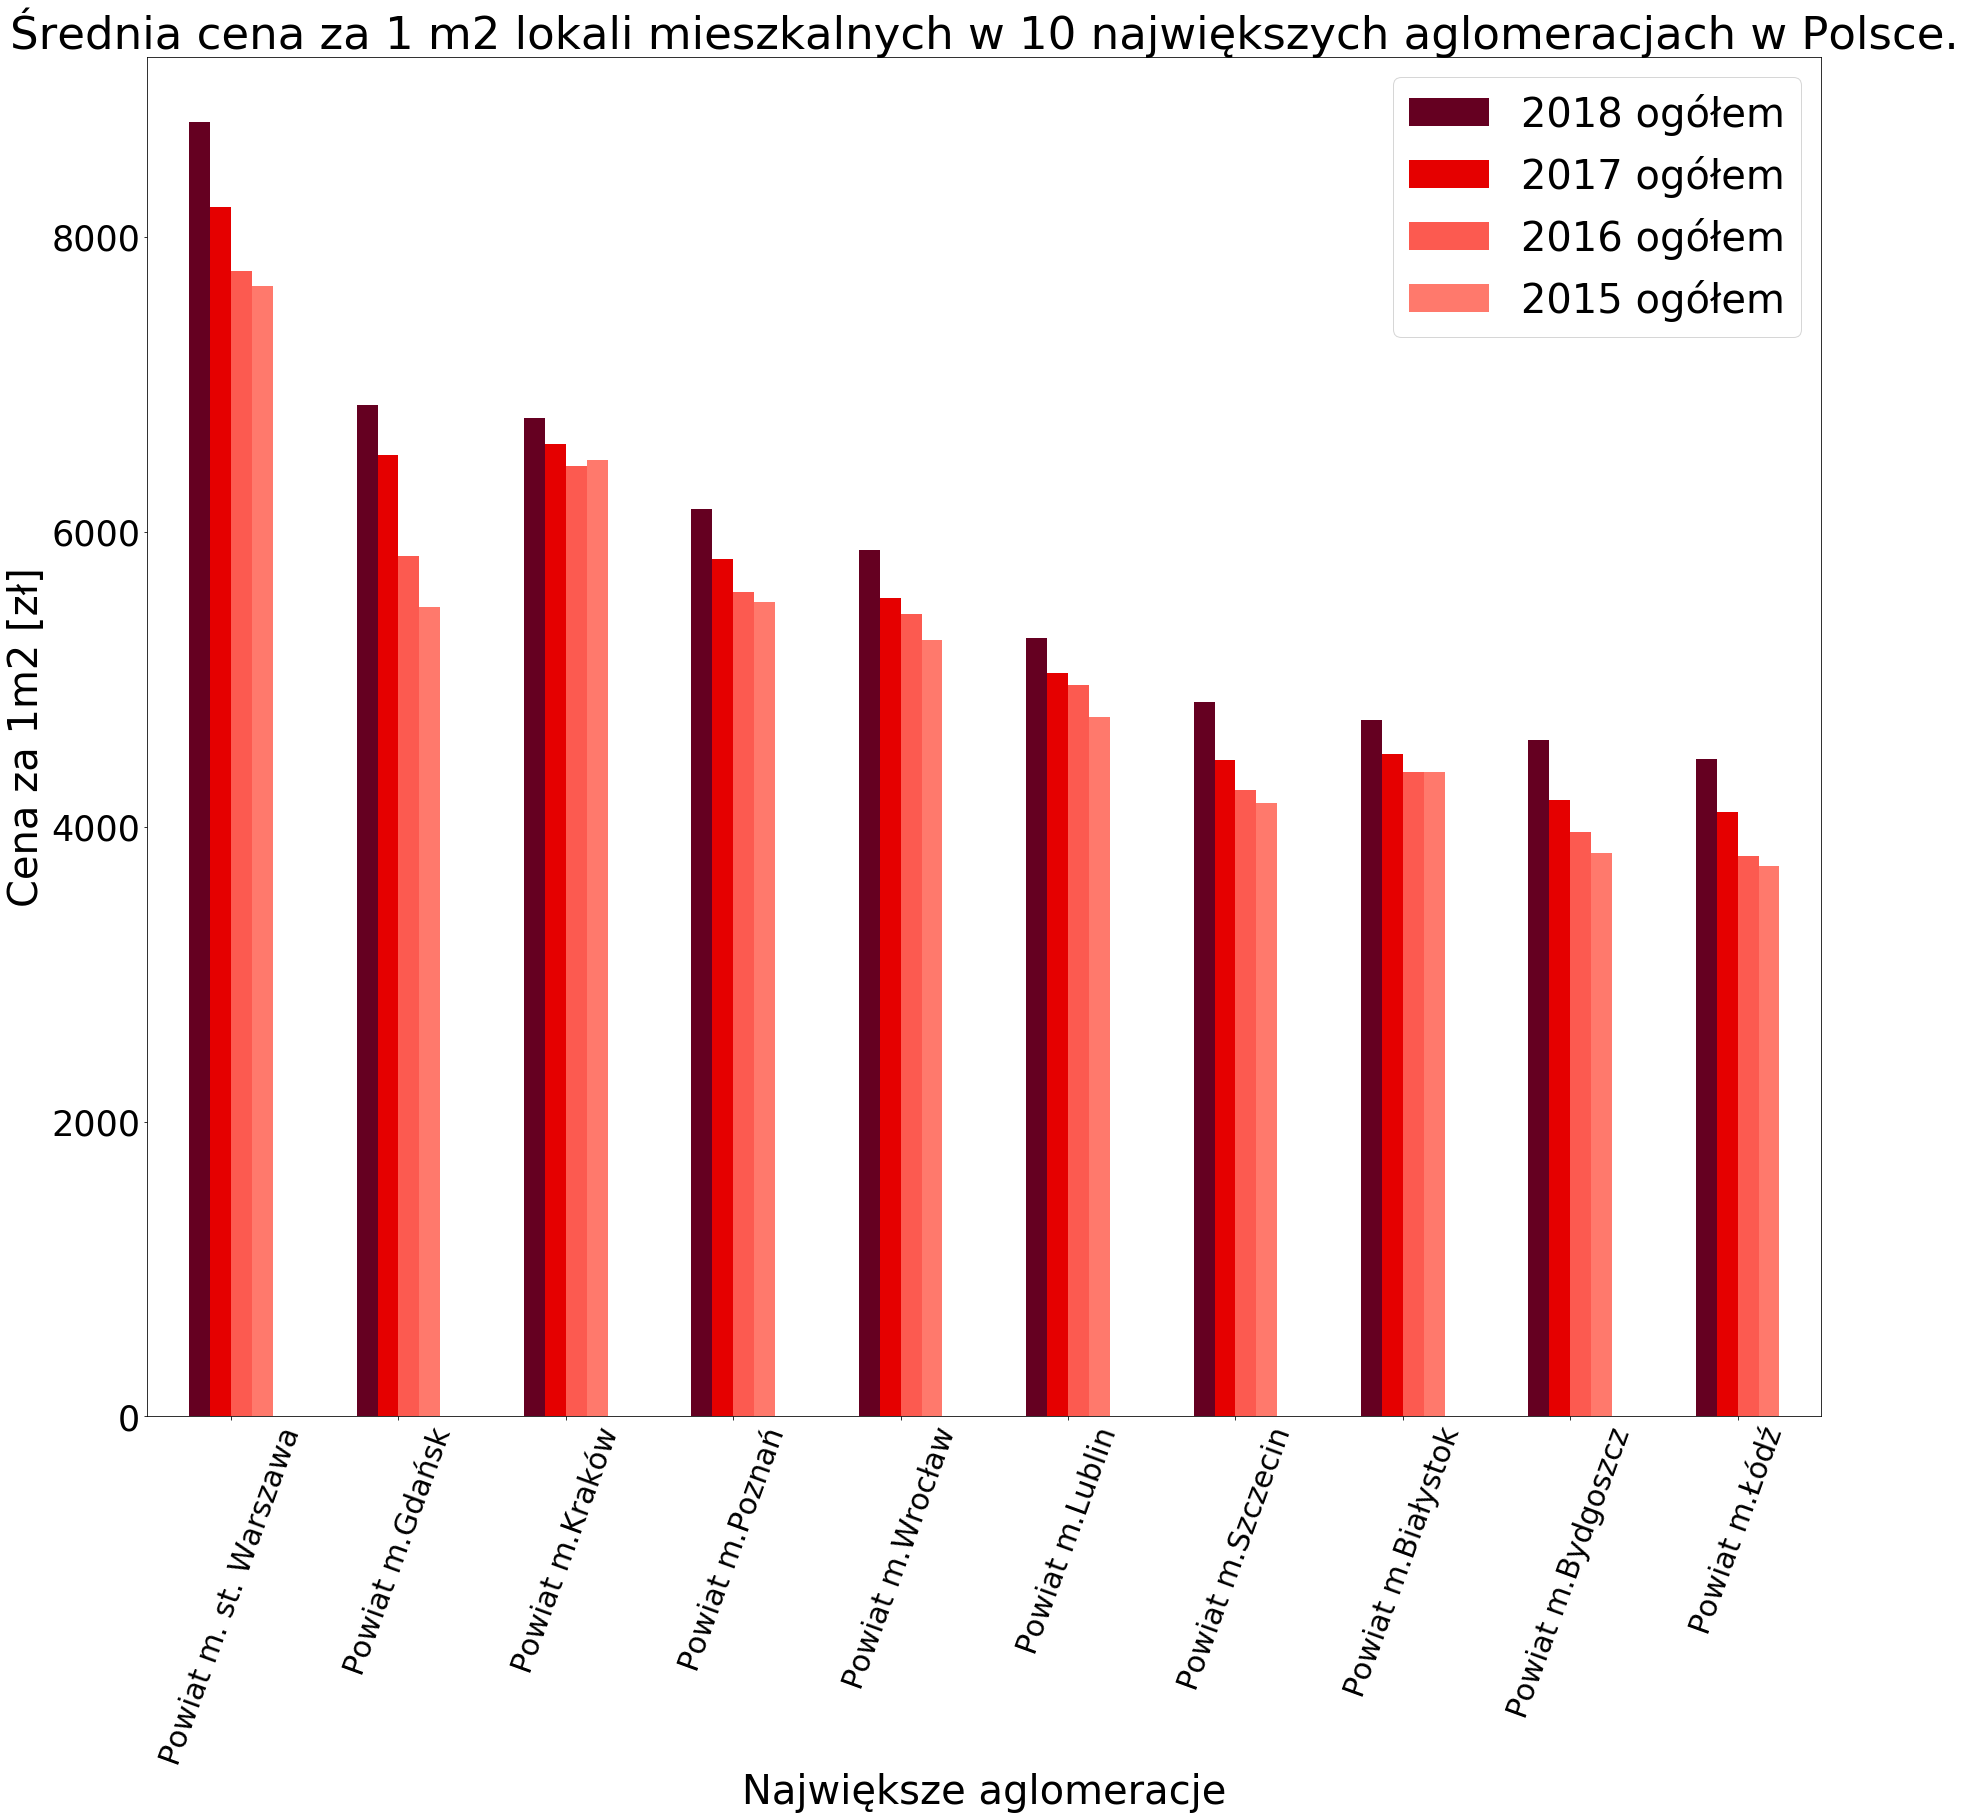

In [14]:
# graph prices per 1m2 in top 10 cities
import matplotlib.pyplot as plt

my_colors1 = ['xkcd:maroon', 'xkcd:red', 'xkcd:coral', 'xkcd:salmon' ]
graf_top10_m2 = top10city_prices_m2[['2018 ogółem','2017 ogółem',
                                           '2016 ogółem','2015 ogółem']].plot(kind='bar', figsize=(30, 25), 
                                                                              legend=True, fontsize=35, color = my_colors1)
graf_top10_m2.set_xlabel("Największe aglomeracje", fontsize=40)
graf_top10_m2.set_ylabel("Cena za 1m2 [zł]", fontsize=40)
graf_top10_m2.set_xticklabels(top10city_prices_m2['Nazwa'], fontsize=30, rotation = 70)
graf_top10_m2.set_title('Średnia cena za 1 m2 lokali mieszkalnych w 10 największych aglomeracjach w Polsce.',fontsize= 45)
plt.legend(fontsize=40)
plt.show()

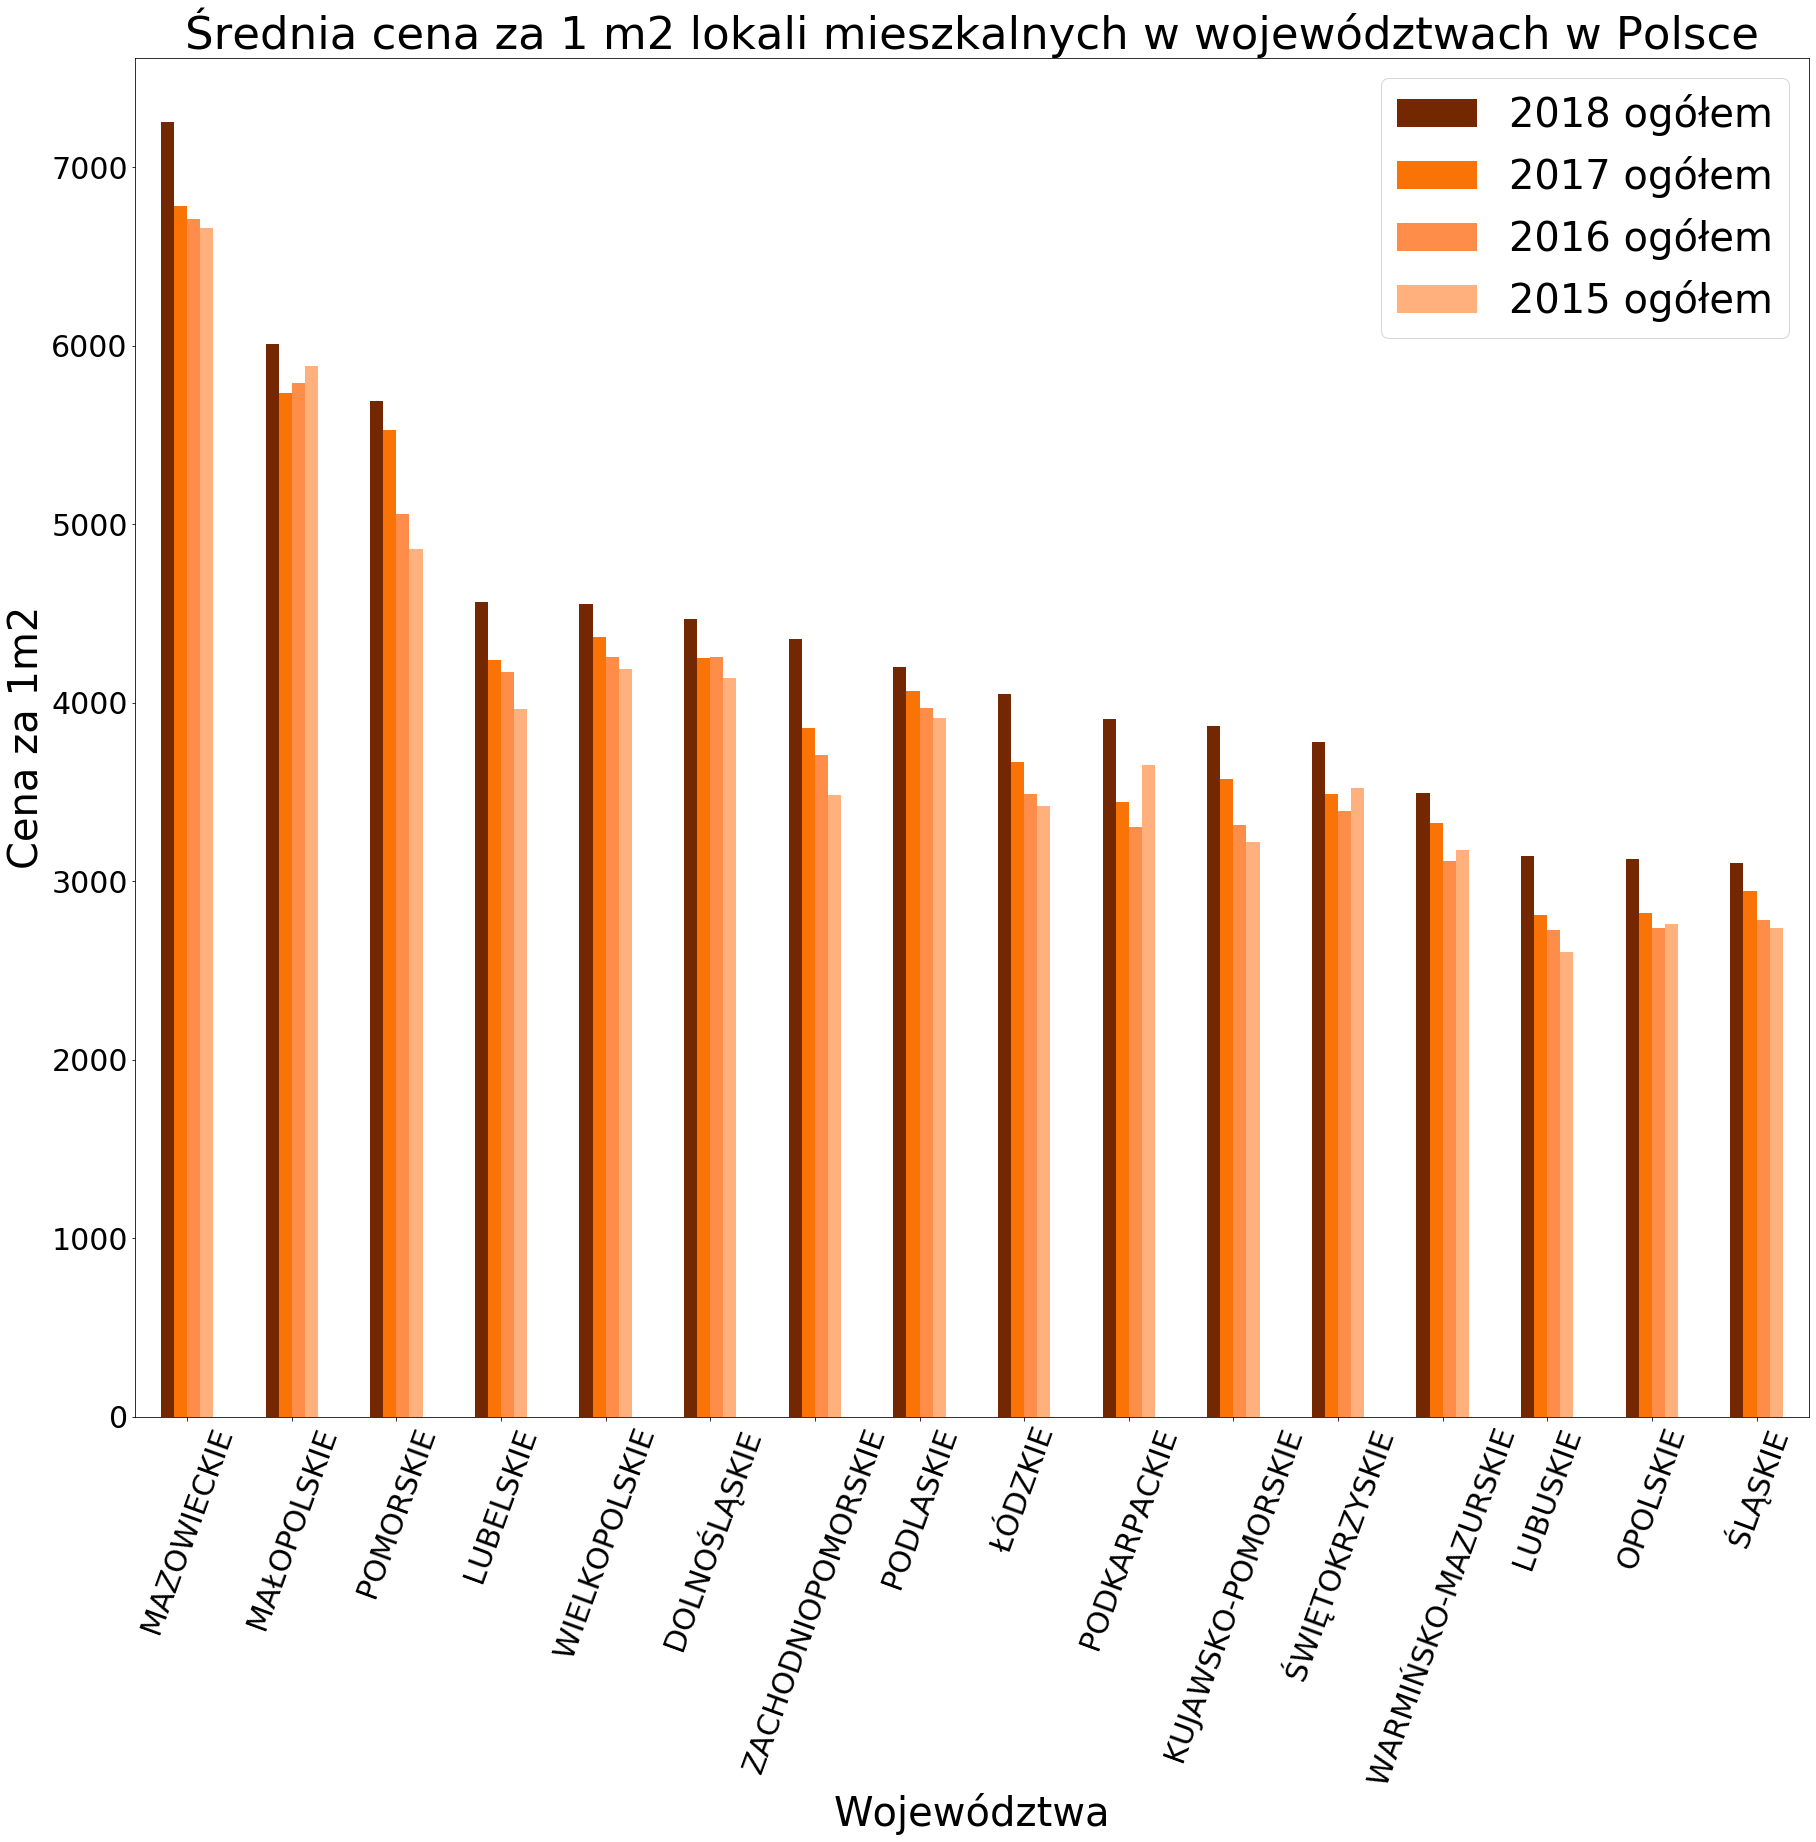

In [15]:
# graph prices per 1m2 in provinces
prices_m2_prov = prices_m2_prov.sort_values(by=['2018 ogółem'], ascending = False)
my_colors2 = ['xkcd:chestnut', 'xkcd:orange', 'xkcd:orangeish', 'xkcd:peach' ]
graf_top10_m2_prov = prices_m2_prov[['2018 ogółem','2017 ogółem',
                                               '2016 ogółem','2015 ogółem']].plot(kind='bar', figsize=(30, 25), 
                                                                                  legend=True, fontsize=30, color = my_colors2)
graf_top10_m2_prov.set_xlabel("Województwa", fontsize=40)
graf_top10_m2_prov.set_ylabel("Cena za 1m2", fontsize=40)
graf_top10_m2_prov.set_xticklabels(prices_m2_prov['Nazwa'], fontsize=30, rotation = 70)
graf_top10_m2_prov.set_title('Średnia cena za 1 m2 lokali mieszkalnych w województwach w Polsce',fontsize= 45)
plt.legend(fontsize=40)
plt.show()

#### <b> Powyższe wykresy pokazują jak zmieniała się średnia cena za 1m2 mieszkań na przestrzeni lat 2015-2018</b> 
Miasta, w któych ceny mieszkań osiągnęły największe wzrosty:
* Warszawa 
* Gdańsk
<br><br>
Stosunkowo stabilny rynek cen zaś widzimy w Krakowie (niewielkie wzrosty cen na przestrzeni badanych 4 lat)

Patrząc przez pryzmat województ warto zwrócić uwagę na województwo **małopolskie**, gdzie przez trzy pierwsze lata ceny mieszkań spadały. Dopiero w 2018 tendencja się odwróciła - ceny mieszkań za 1m2 wzrosły.
    

### <i> Cena sprzedaży mieszkań w TOP10 miastach a w województwach na przestrzeni lat</i> <br> <br> 

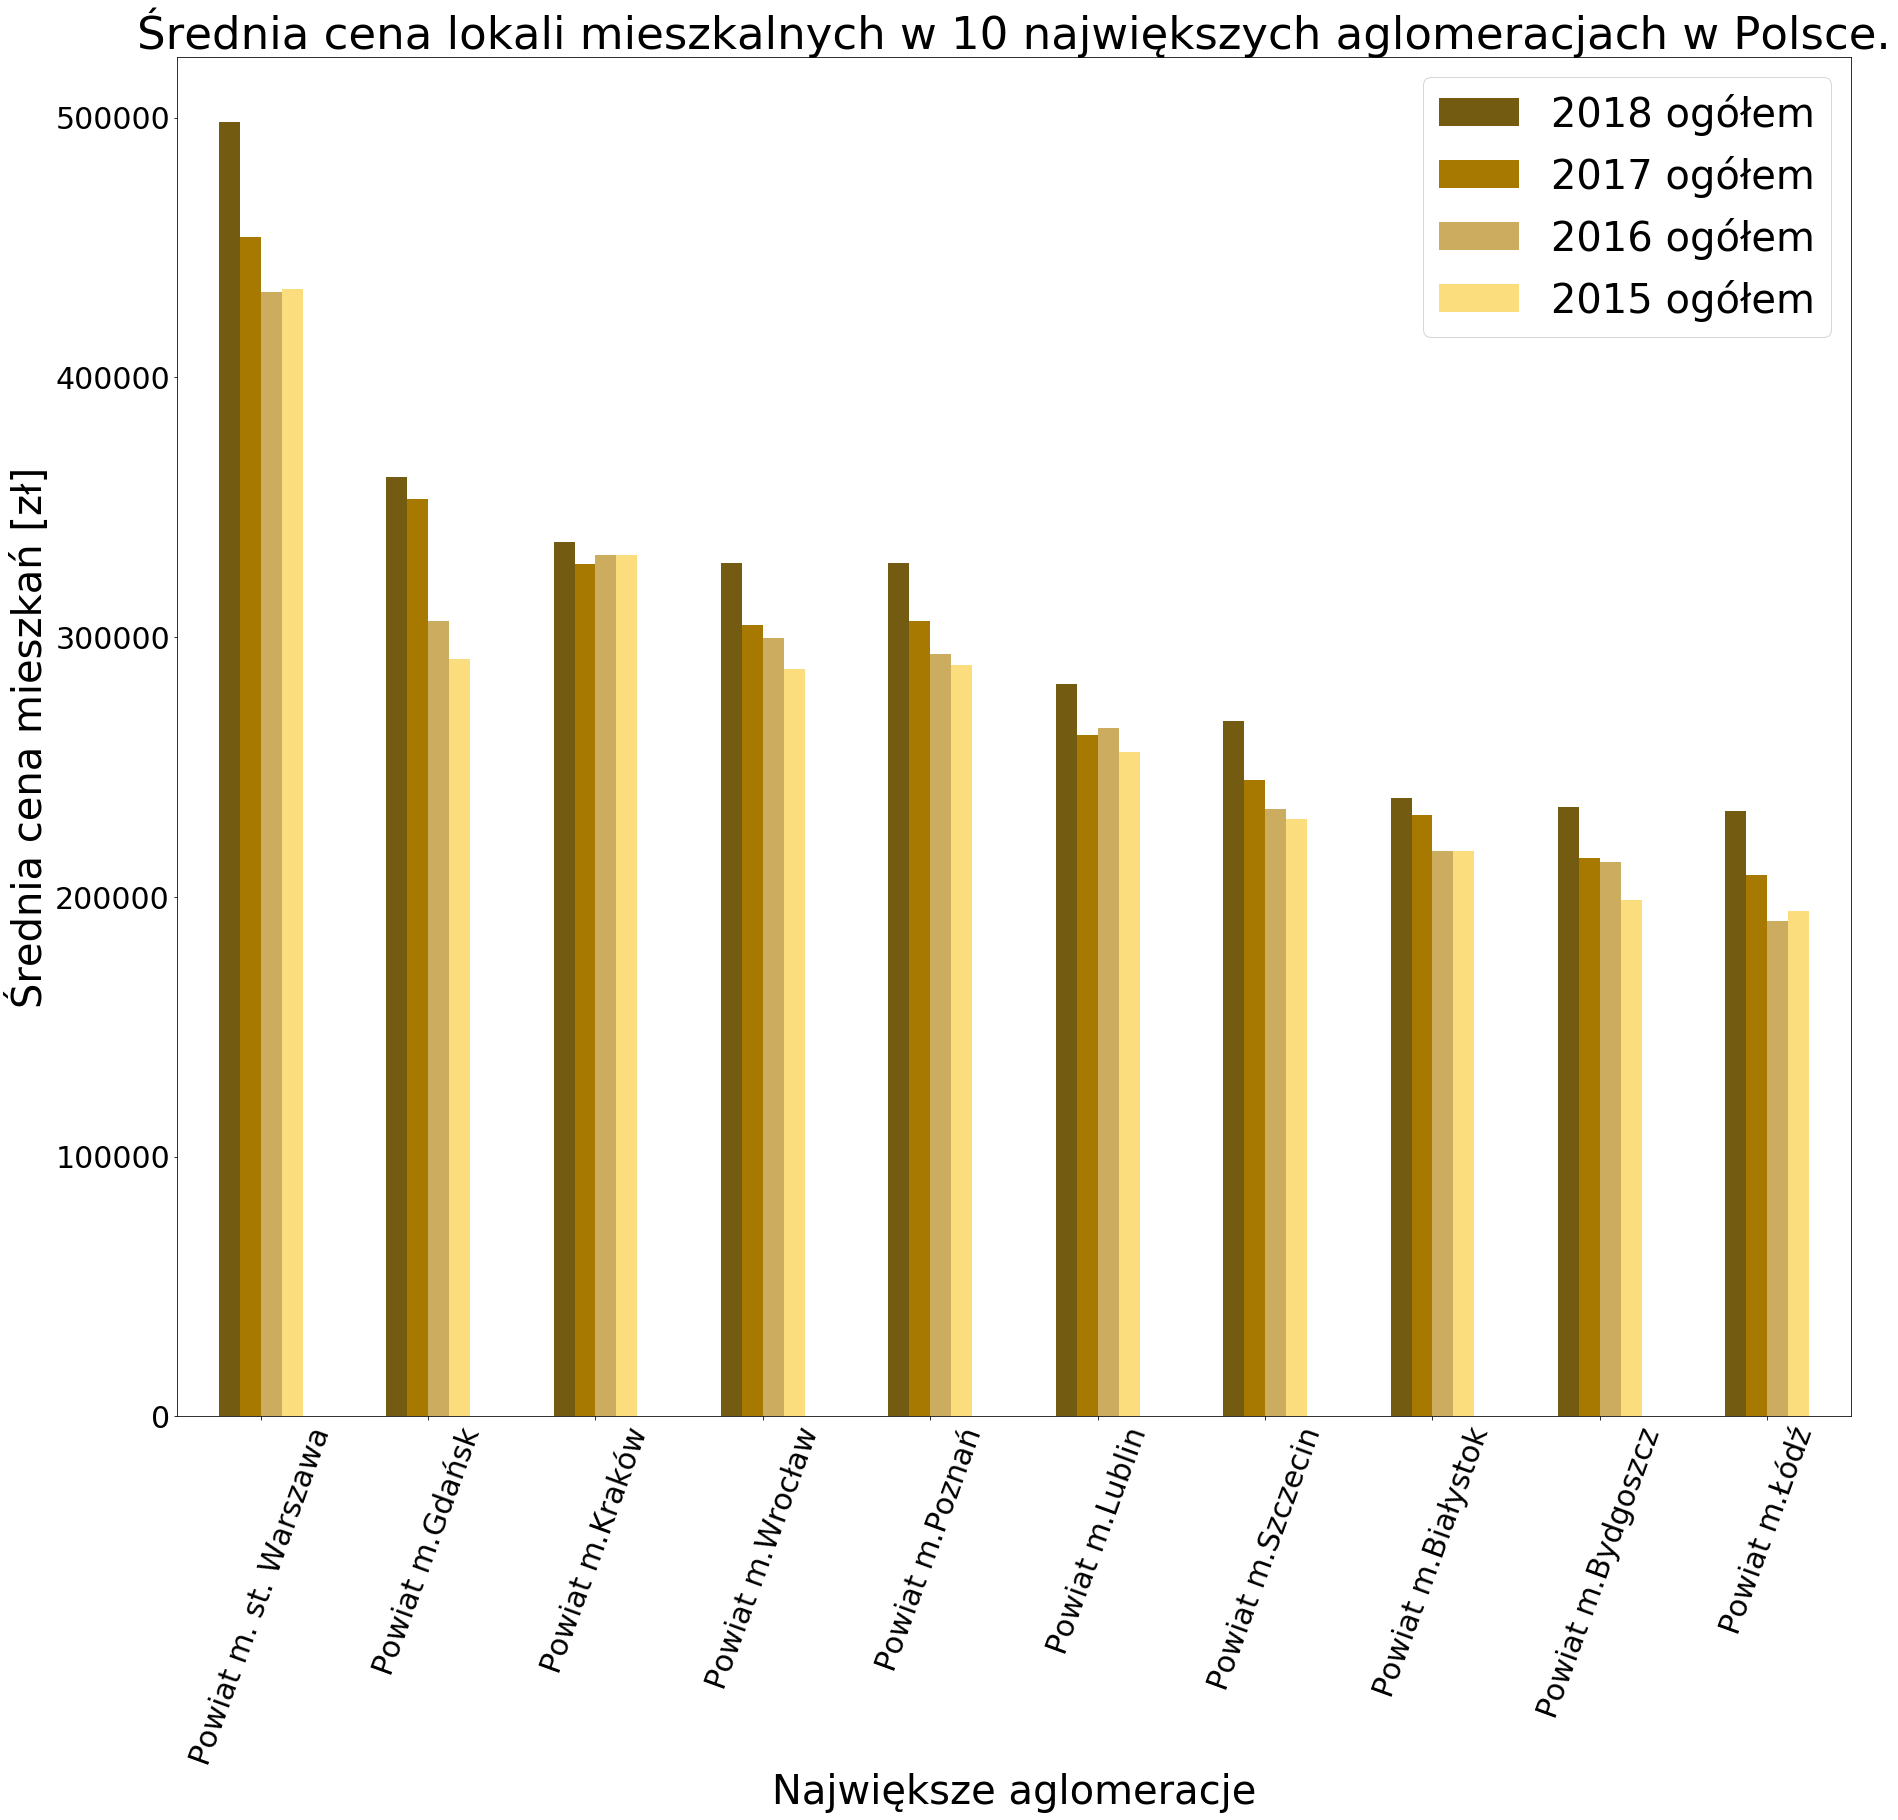

In [16]:
# graph average prices in top 10 cities
my_colors3 = ['xkcd:mud', 'xkcd:bronze', 'xkcd:desert', 'xkcd:wheat' ]
graf_top10_price = top10city_prices[['2018 ogółem','2017 ogółem',
                                      '2016 ogółem','2015 ogółem']].plot(kind='bar', figsize=(30, 25), 
                                                                         legend=True, fontsize=30, color=my_colors3)
graf_top10_price.set_xlabel("Największe aglomeracje", fontsize=40)
graf_top10_price.set_ylabel("Średnia cena mieszkań [zł]", fontsize=40)
graf_top10_price.set_xticklabels(top10city_prices['Nazwa'], fontsize=30, rotation = 70)
graf_top10_price.set_title('Średnia cena lokali mieszkalnych w 10 największych aglomeracjach w Polsce.',fontsize= 45)
plt.legend(fontsize=40)
plt.show()

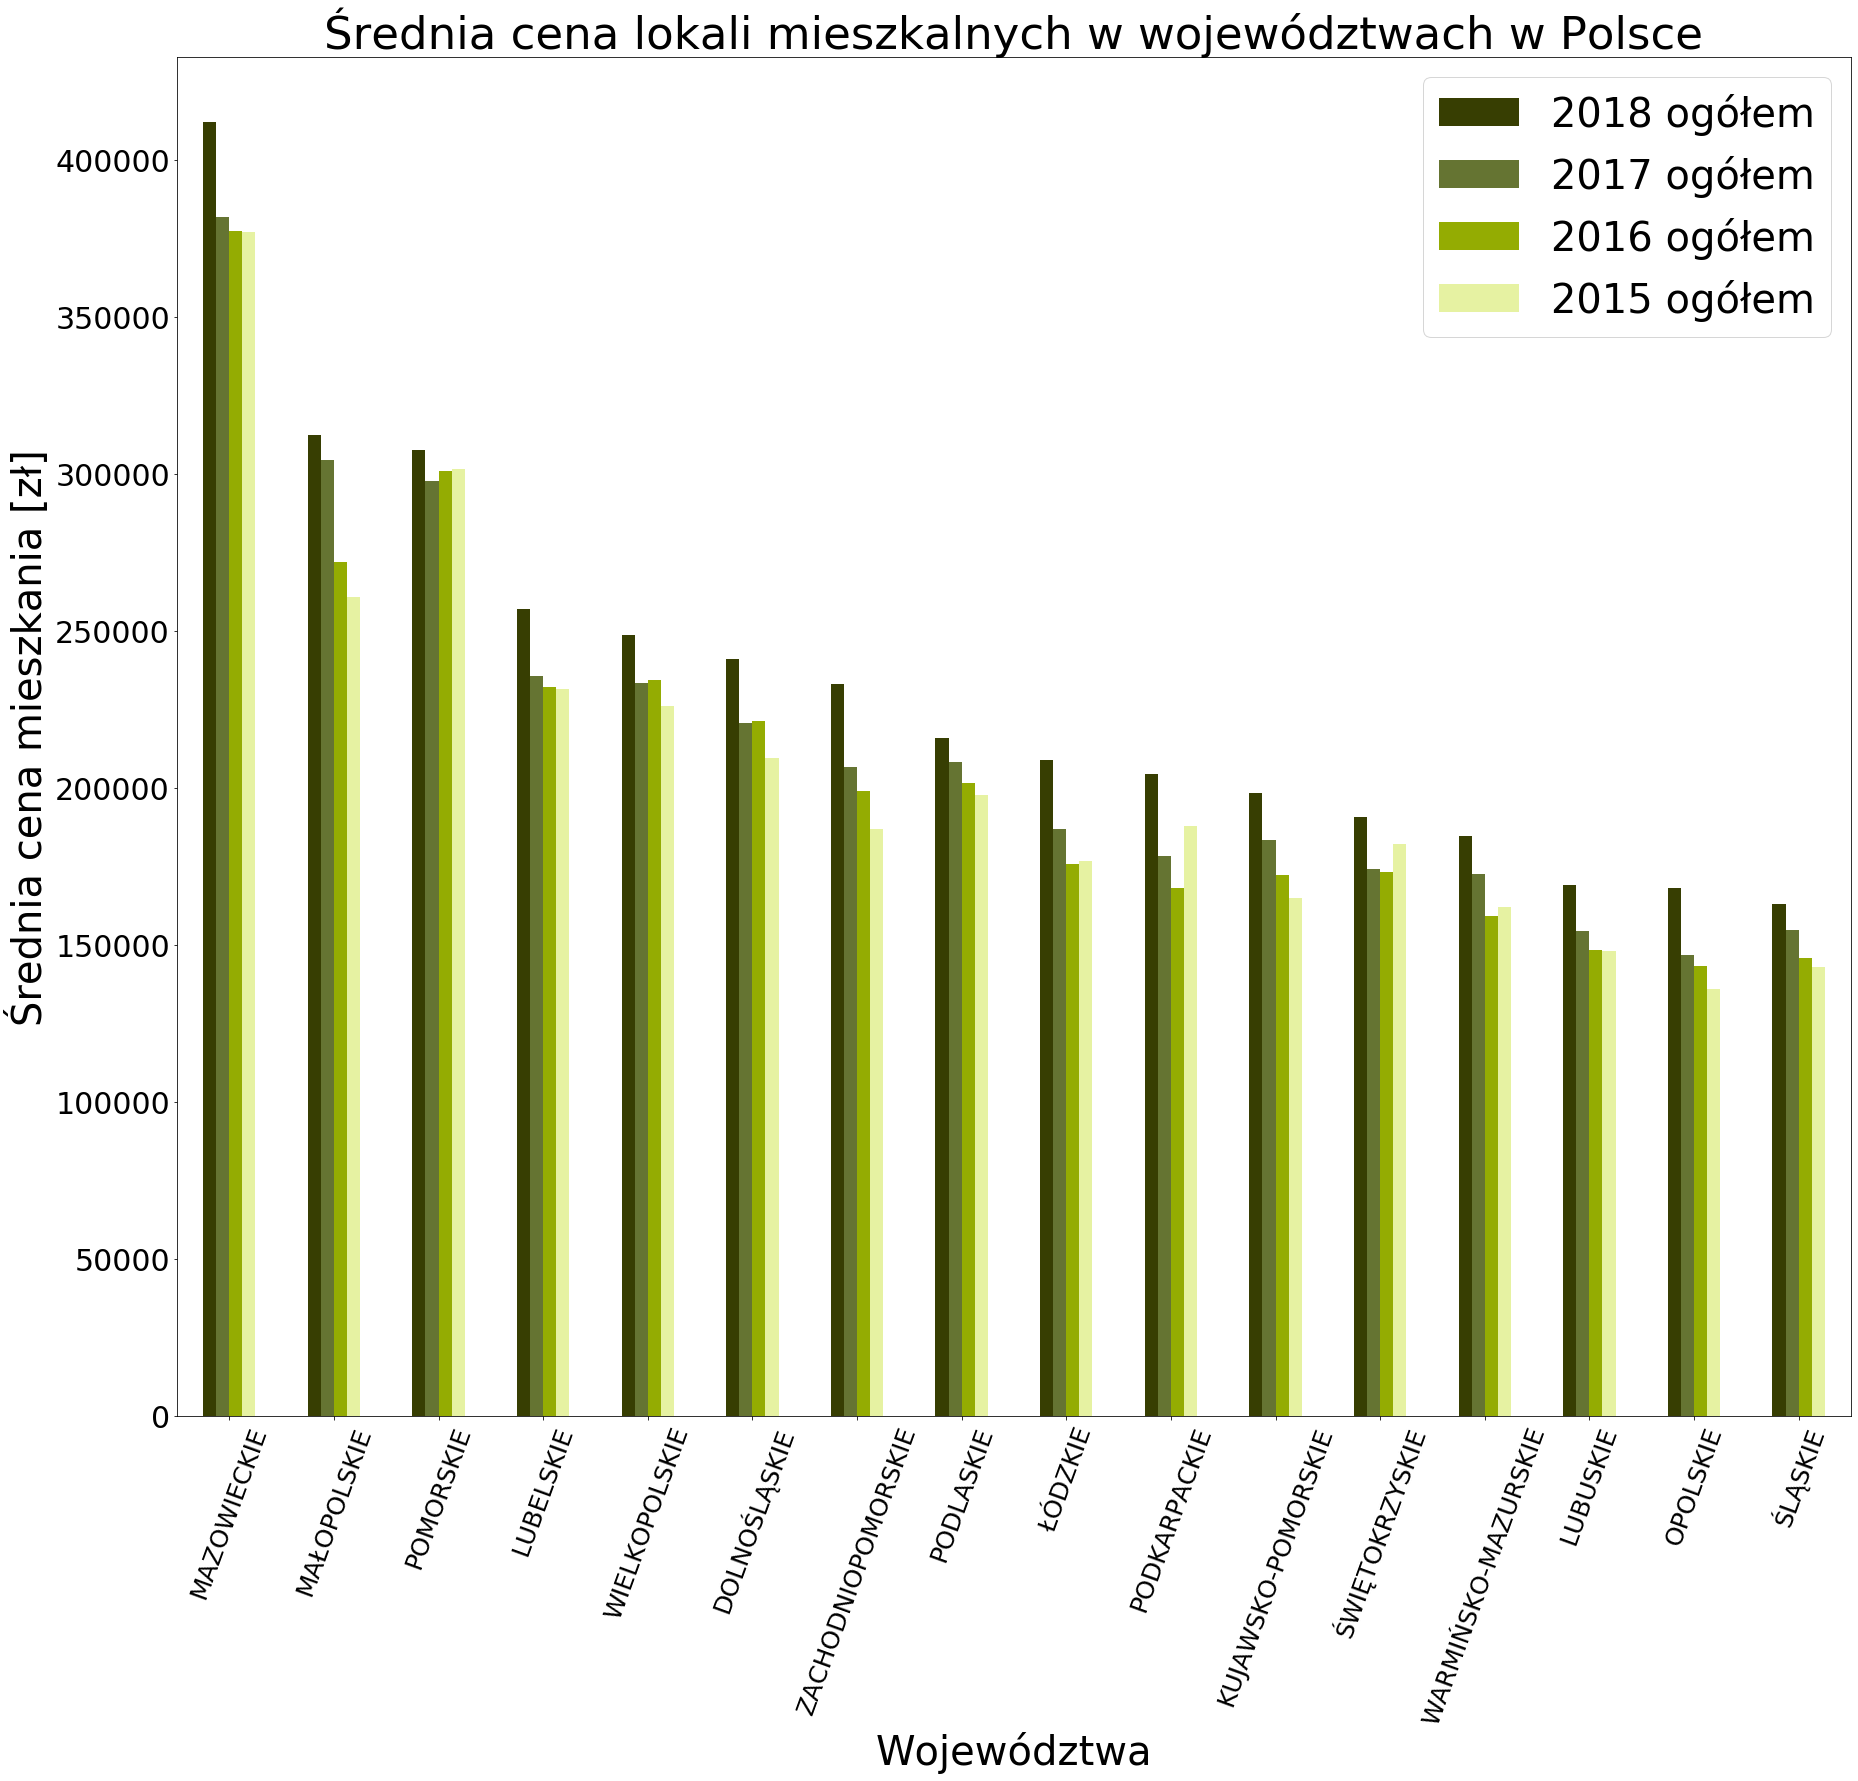

In [17]:
# graph average prices in provinces
prices_prov = prices_prov.sort_values(by=['2018 ogółem'], ascending = False)
my_colors4 = ['xkcd:dark olive', 'xkcd:muddy green', 'xkcd:barf green', 'xkcd:light khaki' ]
graf_top10_price_prov = prices_prov[['2018 ogółem','2017 ogółem',
                                          '2016 ogółem','2015 ogółem']].plot(kind='bar', figsize=(30, 25), 
                                                                             legend=True, fontsize=30, color=my_colors4)
graf_top10_price_prov.set_xlabel("Województwa", fontsize=40)
graf_top10_price_prov.set_ylabel("Średnia cena mieszkania [zł]", fontsize=40)
graf_top10_price_prov.set_xticklabels(prices_m2_prov['Nazwa'], fontsize=25, rotation=70)
graf_top10_price_prov.set_title('Średnia cena lokali mieszkalnych w województwach w Polsce',fontsize= 45)
plt.legend(fontsize=40)
plt.show()

#### <b> Powyższe wykresy pokazują jak zmieniała się cena sprzedaży mieszkań na przestrzeni lat 2015-2018</b> 

Spójrzmy na najdroższe i najtańsze mieszkania:
* kupując mieszkanie w Warszawie w 2018 roku zapłacilibyśmy za nie 2-krotnie więcej niż za mieszkanie w Łodzi
<br><br>

Warszawa a całe województwo:
* średnia cena mieszkania w **Warszawie** w 2018 roku wynosiła 500 tys zł, w całym województwie **mazowieckim** zaś niewiele powyżej 400 tys zł - różnica rzędu 20%

## <i> Sprzedaż mieszkań na przestrzeni lat</i> <br> <br> 

<class 'pandas.core.frame.DataFrame'>


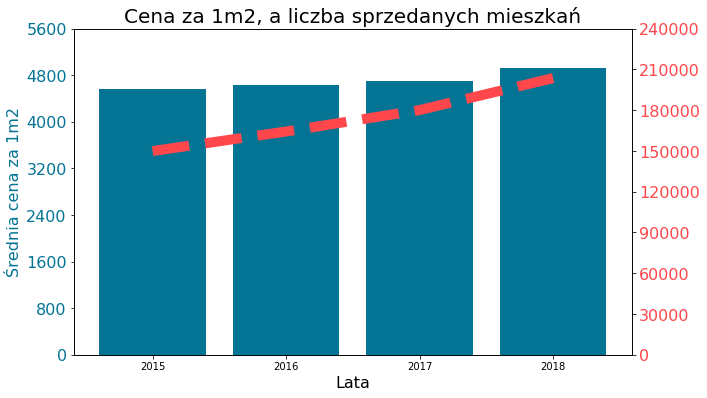

In [18]:
# prices per m2 vs sold flats
prices_m2_pl_main = prices_m2_pl[['2015 ogółem', '2016 ogółem', '2017 ogółem', '2018 ogółem']]
prices_m2_pl_main = prices_m2_pl_main.rename(columns = {'2015 ogółem' : '2015', '2016 ogółem' : '2016', '2017 ogółem' : '2017',
                                         '2018 ogółem' : '2018'})
prices_m2_pl_main = pd.melt(prices_m2_pl_main)
prices_m2_pl_main = prices_m2_pl_main.rename(columns = {'variable' : 'rok', 'value' : 'avg price per m2'})
prices_m2_pl_main = prices_m2_pl_main.apply(pd.to_numeric)

sold_pl_main = sold_pl[['2015 ogółem', '2016 ogółem', '2017 ogółem', '2018 ogółem']]
sold_pl_main = sold_pl_main.rename(columns = {'2015 ogółem' : '2015', '2016 ogółem' : '2016', '2017 ogółem' : '2017',
                                         '2018 ogółem' : '2018'})
sold_pl_main = pd.melt(sold_pl_main)
sold_pl_main = sold_pl_main.rename(columns = {'variable' : 'rok', 'value' : 'sold flats'})
sold_pl_main = sold_pl_main.apply(pd.to_numeric)

graf_m2_soldflats = pd.merge(prices_m2_pl_main, sold_pl_main, how = 'left', on = 'rok')
graf_m2_soldflats.index = graf_m2_soldflats['rok']
graf_m2_soldflats = graf_m2_soldflats.apply(pd.to_numeric)
print(type(graf_m2_soldflats))

plt.figure(figsize = (10,6))
plt.xlabel('Lata',color='black',fontsize=16)
plt.ylabel('Średnia cena za 1m2', color='xkcd:sea blue', fontsize=16)
plt.title('Cena za 1m2, a liczba sprzedanych mieszkań', fontsize = 20)

ax1=plt.gca()
ax1.bar(graf_m2_soldflats['rok'],graf_m2_soldflats['avg price per m2'], color='xkcd:sea blue')
ax1.set_yticks(np.arange(0, 6000, 800))
ax1.set_yticklabels(np.arange(0, 6000, 800), color='xkcd:sea blue', fontsize = 16)
ax2=ax1.twinx()
ax2.plot(graf_m2_soldflats['rok'],graf_m2_soldflats['sold flats'], color='xkcd:light red', linestyle='--', linewidth=10.0)
ax2.set_yticks(np.arange(0, 250000, 30000))
ax2.set_yticklabels(np.arange(0, 250000, 30000), color='xkcd:light red', fontsize = 16)
ax2.xaxis.set_ticks(graf_m2_soldflats['rok'])

<class 'pandas.core.frame.DataFrame'>


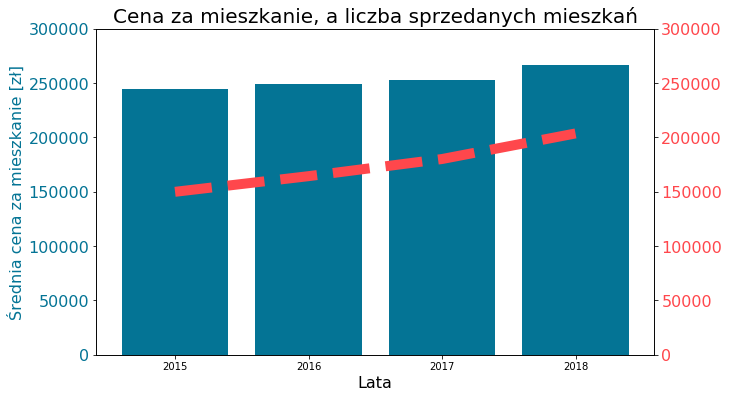

In [19]:
# flats prices vs sold flats
prices_pl_main = prices_pl[['2015 ogółem', '2016 ogółem', '2017 ogółem', '2018 ogółem']]
prices_pl_main = prices_pl_main.rename(columns = {'2015 ogółem' : '2015', '2016 ogółem' : '2016', '2017 ogółem' : '2017',
                                         '2018 ogółem' : '2018'})
prices_pl_main = pd.melt(prices_pl_main)
prices_pl_main = prices_pl_main.rename(columns = {'variable' : 'rok', 'value' : 'avg price flat'})
prices_pl_main = prices_pl_main.apply(pd.to_numeric)

sold_pl_main

graf_price_soldflats = pd.merge(prices_pl_main, sold_pl_main, how = 'left', on = 'rok')
graf_price_soldflats.index = graf_price_soldflats['rok']
graf_price_soldflats = graf_price_soldflats.apply(pd.to_numeric)
print(type(graf_price_soldflats))

plt.figure(figsize = (10,6))
plt.xlabel('Lata',color='black',fontsize=16)
plt.ylabel('Średnia cena za mieszkanie [zł]', color='xkcd:sea blue', fontsize=16)
plt.title('Cena za mieszkanie, a liczba sprzedanych mieszkań', fontsize = 20)
ax1=plt.gca()
ax1.bar(graf_price_soldflats['rok'],graf_price_soldflats['avg price flat'], color='xkcd:sea blue')
ax1.set_yticks(np.arange(0, 310000, 50000))
ax1.set_yticklabels(np.arange(0, 310000, 50000), color='xkcd:sea blue', fontsize = 16)
ax2=ax1.twinx()
ax2.plot(graf_price_soldflats['rok'],graf_price_soldflats['sold flats'], 
         color='xkcd:light red', linestyle='--', linewidth=10.0)
ax2.set_yticks(np.arange(0, 310000, 50000))
ax2.set_yticklabels(np.arange(0, 310000, 50000), color='xkcd:light red', fontsize = 16)
ax2.xaxis.set_ticks(graf_price_soldflats['rok'])

#### <b> Cena za 1m2 nieznacznie rośnie na przestrzeni badanego okresu, największy wzrost zauważalny jest w 2018 roku. </b> 
<br>
Tempo wzrostu ilości sprzedanych mieszkań zaś jest znacznie wyższe - co widoczne jest na wykresie liniowym.

## <i> Sprzedaż mieszkań na przestrzeni roku - czy dostrzegalne są różnice w poszczególnych kwartałach?</i> <br> <br> 

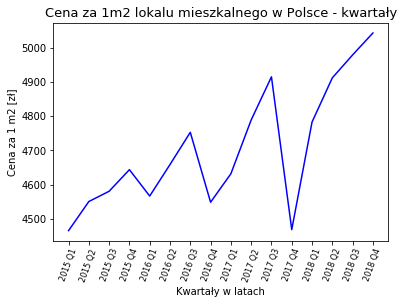

In [20]:
# graph prices flats per m2 in quarters for Poland
prices_m2_quarters_pl = prices_m2_quarters_pl.drop('Nazwa', 1)
prices_m2_quarters_pl = prices_m2_quarters_pl.apply(pd.to_numeric) 
prices_m2_quarters_pl = prices_m2_quarters_pl.iloc[0]
prices_m2_quarters_pl = prices_m2_quarters_pl.to_frame(name='Cena za m2')
prices_m2_quarters_pl['index1'] = prices_m2_quarters_pl.index

graf_m2_quarters = pd.DataFrame(prices_m2_quarters_pl['Cena za m2'], index=prices_m2_quarters_pl['index1'])
plt.xticks(fontsize=8, rotation = 70)
plt.xlabel("Kwartały w latach", fontsize=10)
plt.ylabel("Cena za 1 m2 [zł]", fontsize=10)
plt.title('Cena za 1m2 lokalu mieszkalnego w Polsce - kwartały', fontsize=13)
plt.plot(graf_m2_quarters, color = 'blue')
plt.show()

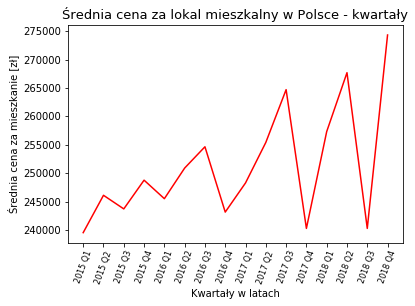

In [21]:
# graph average prices flats in quarters for Poland
prices_quarters_pl = prices_quarters_pl.drop('Nazwa', 1)
prices_quarters_pl = prices_quarters_pl.apply(pd.to_numeric) 
prices_quarters_pl = prices_quarters_pl.iloc[0]
prices_quarters_pl = prices_quarters_pl.to_frame(name='Cena za mieszkanie')
prices_quarters_pl['index1'] = prices_quarters_pl.index

graf_prices_quarters = pd.DataFrame(prices_quarters_pl['Cena za mieszkanie'], index=prices_quarters_pl['index1'])
plt.xticks(fontsize=8, rotation = 70)
plt.xlabel("Kwartały w latach", fontsize=10)
plt.ylabel("Średnia cena za mieszkanie [zł]", fontsize=10)
plt.title('Średnia cena za lokal mieszkalny w Polsce - kwartały', fontsize=13)
plt.plot(graf_prices_quarters, color = 'red')
plt.show()

#### <b> Widoczne znaczące wahania cen na przestrzeni roku</b> <br>
* pod koniec roku - w okolicach 4 kwartału cena mieszkań gwałtownie spada


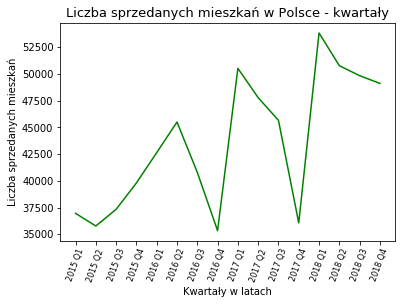

In [22]:
# graph sold flats in quarters for Poland
sold_quarters_pl = sold_quarters_pl.drop('Nazwa', 1)
sold_quarters_pl = sold_quarters_pl.apply(pd.to_numeric) 
sold_quarters_pl = sold_quarters_pl.iloc[0]
sold_quarters_pl = sold_quarters_pl.to_frame(name='Liczba sprzedanych mieszkań')
sold_quarters_pl['index1'] = sold_quarters_pl.index

graf_sold_quarters_pl = pd.DataFrame(sold_quarters_pl['Liczba sprzedanych mieszkań'], index=sold_quarters_pl['index1'])
plt.xticks(fontsize=8, rotation = 70)
plt.xlabel("Kwartały w latach", fontsize=10)
plt.ylabel("Liczba sprzedanych mieszkań", fontsize=10)
plt.title('Liczba sprzedanych mieszkań w Polsce - kwartały', fontsize=13)
plt.plot(graf_sold_quarters_pl, color = 'green')
plt.show()

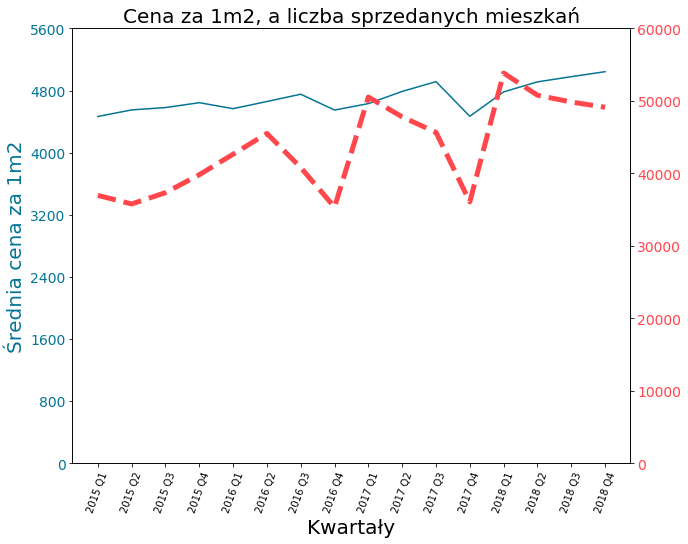

In [23]:
import matplotlib.pyplot as plt

# prices per m2 sold flats - quarters
m2_sold_quarters = pd.merge(prices_m2_quarters_pl, sold_quarters_pl, how = 'left', on = 'index1')
m2_sold_quarters = m2_sold_quarters.rename(columns={'index1': 'Kwartały'})
m2_sold_quarters = m2_sold_quarters[['Kwartały', 'Cena za m2', 'Liczba sprzedanych mieszkań' ]]

plt.figure(figsize = (10,8))
plt.xlabel('Kwartały',color='black',fontsize=20)
plt.ylabel('Średnia cena za 1m2', color='xkcd:sea blue', fontsize=20)
plt.title('Cena za 1m2, a liczba sprzedanych mieszkań', fontsize = 20)
plt.xticks(rotation = 70)

ax1=plt.gca()
ax1.plot(m2_sold_quarters['Kwartały'], m2_sold_quarters['Cena za m2'], color='xkcd:sea blue')
ax1.set_yticks(np.arange(0, 6000, 800))
ax1.set_yticklabels(np.arange(0, 6000, 800), color='xkcd:sea blue', fontsize = 14)
ax2=ax1.twinx()
ax2.plot(m2_sold_quarters['Kwartały'],m2_sold_quarters['Liczba sprzedanych mieszkań'], 
          color='xkcd:light red', linestyle='--', linewidth=5.0)
ax2.set_yticks(np.arange(0, 70000, 10000))
ax2.set_yticklabels(np.arange(0, 70000, 10000), color='xkcd:light red', fontsize = 14)
ax2.xaxis.set_ticks(m2_sold_quarters['Kwartały'])

## <i> Rynek pierwotny a rynek wtórny</i> <br> <br> 

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

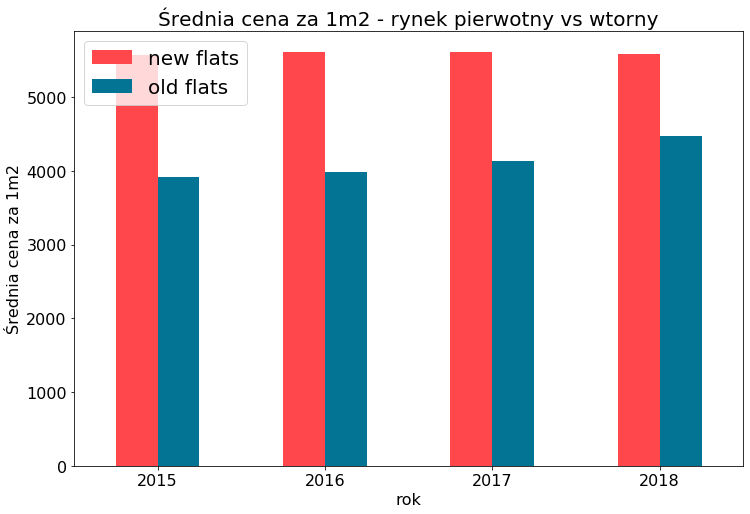

In [24]:
# graph avg prices per m2 - new vs old flats 
prices_m2_new_pl = pd.melt(prices_m2_new_pl)
prices_m2_new_pl.rename(columns = {'variable' : 'rok', 'value' : 'new flats'}, inplace = True)
prices_m2_new_pl = prices_m2_new_pl.drop(prices_m2_new_pl.index[0])

prices_m2_old_pl = pd.melt(prices_m2_old_pl)
prices_m2_old_pl.rename(columns = {'variable' : 'rok', 'value' : 'old flats'}, inplace = True)
prices_m2_old_pl = prices_m2_old_pl.drop(prices_m2_old_pl.index[0])

prices_m2_old_new = pd.merge(prices_m2_new_pl, prices_m2_old_pl, how = 'left', on = 'rok')
prices_m2_old_new = prices_m2_old_new.head(4)
prices_m2_old_new['rok'] = ['2015', '2016', '2017', '2018']
prices_m2_old_new.index = prices_m2_old_new['rok']
prices_m2_old_new = prices_m2_old_new.apply(pd.to_numeric)

my_colors6 = ['xkcd:light red', 'xkcd:sea blue']
graf_old_new_m2 = prices_m2_old_new[['new flats', 'old flats']].plot(kind='bar', figsize=(12, 8), legend=True, 
                                                                   fontsize=16, color = my_colors6)
graf_old_new_m2.set_xlabel('rok', fontsize = 16)
graf_old_new_m2.set_ylabel('Średnia cena za 1m2', fontsize = 16)
graf_old_new_m2.legend(loc = 'upper left', fontsize = 20)
plt.title('Średnia cena za 1m2 - rynek pierwotny vs wtorny', fontsize = 20)
plt.xticks(rotation = 0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

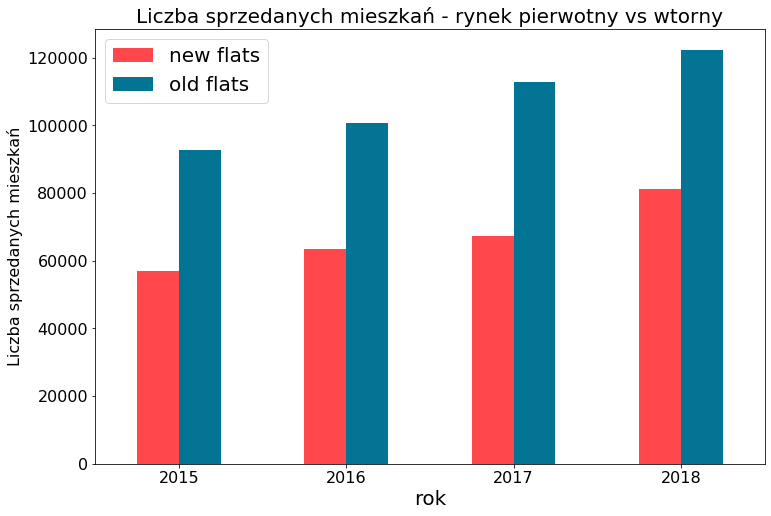

In [25]:
# graph sold flats - new vs old flats 
sold_new_pl = pd.melt(sold_new_pl)
sold_new_pl = sold_new_pl.rename(columns = {'variable' : 'rok', 'value' : 'new flats'})
sold_new_pl = sold_new_pl.drop(sold_new_pl.index[0])

sold_old_pl = pd.melt(sold_old_pl)
sold_old_pl = sold_old_pl.rename(columns = {'variable' : 'rok', 'value' : 'old flats'})
sold_old_pl = sold_old_pl.drop(sold_old_pl.index[0])

sold_old_new = pd.merge(sold_new_pl, sold_old_pl, how = 'left', on = 'rok')
sold_old_new = sold_old_new.head(4)
sold_old_new['rok'] = ['2015', '2016', '2017', '2018']
sold_old_new.index = sold_old_new['rok']
sold_old_new = sold_old_new.apply(pd.to_numeric)

my_colors5 = ['xkcd:light red', 'xkcd:sea blue']
graf_old_new = sold_old_new[['new flats', 'old flats']].plot(kind='bar', figsize=(12, 8), legend=True, 
                                                                   fontsize=16, color = my_colors5)
graf_old_new.set_xlabel('rok', fontsize = 20)
graf_old_new.set_ylabel('Liczba sprzedanych mieszkań', fontsize = 16)
graf_old_new.legend(loc = 'upper left', fontsize = 20)
plt.title('Liczba sprzedanych mieszkań - rynek pierwotny vs wtorny', fontsize = 20)
plt.xticks(rotation = 0)

#### <b> Rynek pierwotny a rynek wtórny</b> 

Cena za 1m2:
* za mieszkanie z rynku pierwotnego musimy zapłacić średnio 20-25% wyższą cenę za 1m2 niż w przypadku rynku wtórnego
* cena mieszkań na rynku pierwotnym na przestrzeni badanego okresu jest stabilna, na rynku wtórnym zaś widoczny jest trend wzrostowy
<br><br>

Liczba sprzedanych mieszkań:
* około **40%** sprzedawanych mieszkań to mieszkania z rynku pierwotnego, około **60%** stanowi rynek wtórny
* zarówno na rynku pierwotnym jak i wtórnym liczba sprzedanych mieszkań rośnie z roku na rok

## <i> Powierzchnia mieszkalna</i> <br> <br> 

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

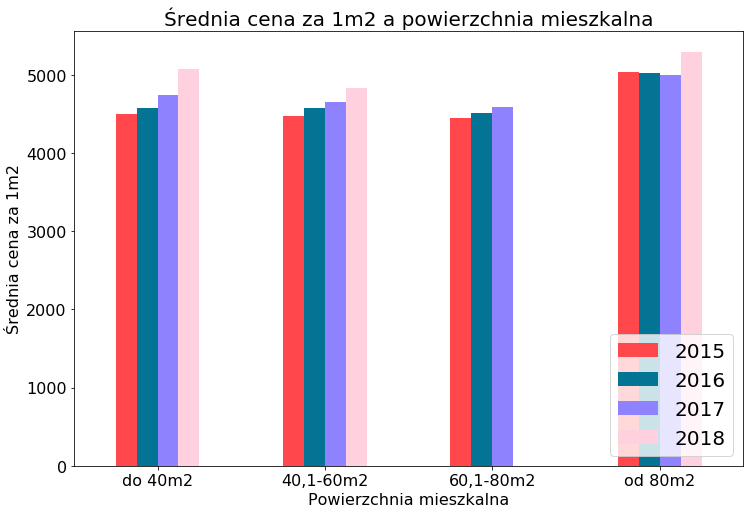

In [26]:
# graph avg price per 1m2 - square meters living space
prices_m2_pl 
prices_m2_pl_to40 = prices_m2_pl[['2015 do 40m2', '2016 do 40m2', '2017 do 40m2', '2018 do 40m2']]
prices_m2_pl_from40 = prices_m2_pl[['2015 40,1-60m2', '2016 40,1-60m2', '2017 40,1-60m2', '2018 40,1-60m2']]
prices_m2_pl_from60 = prices_m2_pl[['2015 60,1-80m2', '2016 60,1-80m2', '2017 60,1-80m2']]
prices_m2_pl_from80 = prices_m2_pl[['2015 od 80m2', '2016 od 80m2', '2017 od 80m2', '2018 od 80m2']]

prices_m2_pl_to40 = prices_m2_pl_to40.apply(pd.to_numeric)
prices_m2_pl_to40['powierzchnia'] = ['do 40m2']
prices_m2_pl_from40 = prices_m2_pl_from40.apply(pd.to_numeric)
prices_m2_pl_from40['powierzchnia'] = ['40,1-60m2']
prices_m2_pl_from60 = prices_m2_pl_from60.apply(pd.to_numeric)
prices_m2_pl_from60['powierzchnia'] = ['60,1-80m2']
prices_m2_pl_from80 = prices_m2_pl_from80.apply(pd.to_numeric)
prices_m2_pl_from80['powierzchnia'] = ['od 80m2']

prices_m2_pl_to40.rename(columns = {'2015 do 40m2' : '2015', '2016 do 40m2' : '2016', '2017 do 40m2' : '2017',
                                    '2018 do 40m2' : '2018'}, inplace = True)
prices_m2_pl_from40.rename(columns = {'2015 40,1-60m2' : '2015', '2016 40,1-60m2' : '2016', '2017 40,1-60m2' : '2017',
                                    '2018 40,1-60m2' : '2018'}, inplace = True)
prices_m2_pl_from60.rename(columns = {'2015 60,1-80m2' : '2015', '2016 60,1-80m2' : '2016', '2017 60,1-80m2' : '2017',
                                    '2018 60,1-80m2' : '2018'}, inplace = True)
prices_m2_pl_from80.rename(columns = {'2015 od 80m2' : '2015', '2016 od 80m2' : '2016', '2017 od 80m2' : '2017',
                                    '2018 od 80m2' : '2018'}, inplace = True)

prices_m2_pl_combined = pd.concat([prices_m2_pl_to40, prices_m2_pl_from40, 
                                             prices_m2_pl_from60, prices_m2_pl_from80])
prices_m2_pl_combined.index = prices_m2_pl_combined['powierzchnia']


my_colors8 = ['xkcd:light red', 'xkcd:sea blue', 'xkcd:periwinkle', 'xkcd:light pink' ]
graf_prices_m2_size = prices_m2_pl_combined[['2015', '2016', '2017', '2018']].plot(kind='bar', figsize=(12, 8), 
                                                                                                legend=True, fontsize=16, color = my_colors8)
graf_prices_m2_size.set_xlabel('Powierzchnia mieszkalna', fontsize = 16)
graf_prices_m2_size.set_ylabel('Średnia cena za 1m2', fontsize = 16)
graf_prices_m2_size.legend(loc = 'lower right', fontsize = 20)
plt.title('Średnia cena za 1m2 a powierzchnia mieszkalna', fontsize = 20)
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

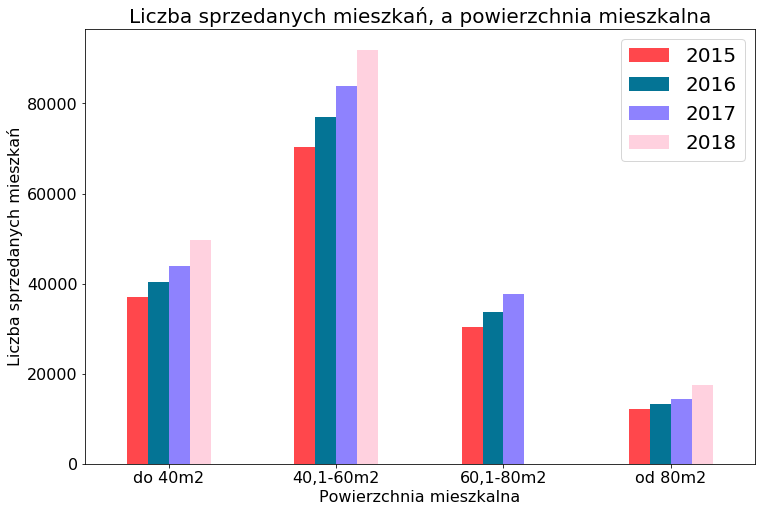

In [27]:
# graph sold flats - square meters living space
sold_pl_main
sold_pl_to40 = sold_pl[['2015 do 40m2', '2016 do 40m2', '2017 do 40m2', '2018 do 40m2']]
sold_pl_from40 = sold_pl[['2015 40,1-60m2', '2016 40,1-60m2', '2017 40,1-60m2', '2018 40,1-60m2']]
sold_pl_from60 = sold_pl[['2015 60,1-80m2', '2016 60,1-80m2', '2017 60,1-80m2']]
sold_pl_from80 = sold_pl[['2015 od 80m2', '2016 od 80m2', '2017 od 80m2', '2018 od 80m2']]

sold_pl_to40 = sold_pl_to40.apply(pd.to_numeric)
sold_pl_to40['powierzchnia'] = ['do 40m2']
sold_pl_from40 = sold_pl_from40.apply(pd.to_numeric)
sold_pl_from40['powierzchnia'] = ['40,1-60m2']
sold_pl_from60 = sold_pl_from60.apply(pd.to_numeric)
sold_pl_from60['powierzchnia'] = ['60,1-80m2']
sold_pl_from80 = sold_pl_from80.apply(pd.to_numeric)
sold_pl_from80['powierzchnia'] = ['od 80m2']

sold_pl_to40.rename(columns = {'2015 do 40m2' : '2015', '2016 do 40m2' : '2016', '2017 do 40m2' : '2017',
                                    '2018 do 40m2' : '2018'}, inplace = True)
sold_pl_from40.rename(columns = {'2015 40,1-60m2' : '2015', '2016 40,1-60m2' : '2016', '2017 40,1-60m2' : '2017',
                                    '2018 40,1-60m2' : '2018'}, inplace = True)
sold_pl_from60.rename(columns = {'2015 60,1-80m2' : '2015', '2016 60,1-80m2' : '2016', '2017 60,1-80m2' : '2017',
                                    '2018 60,1-80m2' : '2018'}, inplace = True)
sold_pl_from80.rename(columns = {'2015 od 80m2' : '2015', '2016 od 80m2' : '2016', '2017 od 80m2' : '2017',
                                    '2018 od 80m2' : '2018'}, inplace = True)

sold_pl_combined = pd.concat([sold_pl_to40, sold_pl_from40, sold_pl_from60, sold_pl_from80])
sold_pl_combined.index = sold_pl_combined['powierzchnia']

my_colors7 = ['xkcd:light red', 'xkcd:sea blue', 'xkcd:periwinkle', 'xkcd:light pink' ]
graf_sold_size = sold_pl_combined[['2015', '2016', '2017', '2018']].plot(kind='bar', figsize=(12, 8), legend=True, 
                                                                   fontsize=16, color = my_colors7)
graf_sold_size.set_xlabel('Powierzchnia mieszkalna', fontsize = 16)
graf_sold_size.set_ylabel('Liczba sprzedanych mieszkań', fontsize = 16)
graf_sold_size.legend(loc = 'upper right', fontsize = 20)
plt.title('Liczba sprzedanych mieszkań, a powierzchnia mieszkalna', fontsize = 20)
plt.xticks(rotation = 0)

#### <b> Powyższe wykresy przestawiają cenę mieszkań w zależności od powierzchni</b> 

Przyjęło się, że cena za 1m2 maleje wraz ze wzrostem powierzchni mieszkania. Tendencja ta widoczna jest dla mieszkań 
o powierzchni do **80m2**.
Dla mieszkań powyżej tego metrażu - cena za 1m2 jest znacznie wyższa.
<br>
<br>
Dlaczego?
* mieszkania o większej powierzchni to zazwyczaj apartamenty - czyli mieszkania o podwyższonym standardzie.


## <i> Jakie czynniki mogą wpływać na cenę mieszkań?</i> <br> <br> 

Przyjrzyjmy się jeszcze raz średniej cenie za 1m2 oraz wskaźnikom ekonomicznym takim jak:
* inflacja
* bezrobocie
* poziom wynagrodzeń

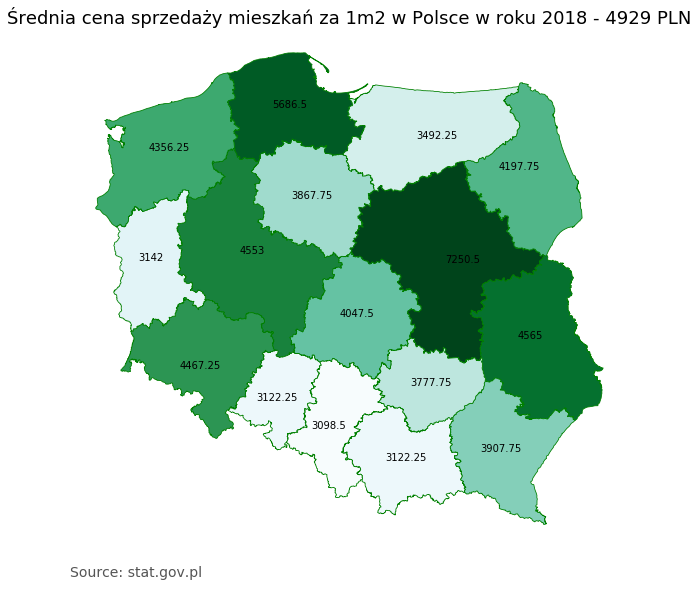

In [28]:
# prices flats per m2
prices_m2_prov_map = prices_m2_prov[['Nazwa', '2018 ogółem']]
prices_m2_prov_map = prices_m2_prov_map.rename(columns = {'2018 ogółem' : 'prices_per_m2'})

combined_data_perm2 = poland_data.merge(prices_m2_prov_map, on = 'Nazwa')
combined_data_perm2 = combined_data_perm2[['Nazwa', 'geometry', 'prices_per_m2']]

combined_data_perm2 = combined_data_perm2.to_crs(epsg=2180)
fig, ax = plt.subplots(1, figsize = (10,10))

ax.annotate('Source: stat.gov.pl',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=14 ,color='#555555')

title = 'Średnia cena sprzedaży mieszkań za 1m2 w Polsce w roku 2018 - 4929 PLN'
ax.set_title(title, fontdict={'fontsize': '18', 'fontweight' : '6'})

combined_data_perm2.plot(cmap = 'BuGn', column = 'prices_per_m2', ax = ax, linewidth=0.8, edgecolor='green', 
                         figsize = (10,10))
ax.axis('off') 

combined_data_perm2['coords'] = combined_data_perm2['geometry'].apply(lambda x: x.representative_point().coords[:])
combined_data_perm2['coords'] = [coords[0] for coords in combined_data_perm2['coords']]
for idx, row in combined_data_perm2.iterrows():
    plt.annotate(s=row['prices_per_m2'], xy=row['coords'],horizontalalignment='center')


#### <b> Województwa w których średnia cena za 1m2 przekraczała średnią cenę w Polsce to:</b> 
* mazowieckie
* pomorskie
<br>
Najniższe ceny zaś to województwa:
* opolskie
* śląskie
* małopolskie

#### <i> Inflacja </i> <br> <br> 

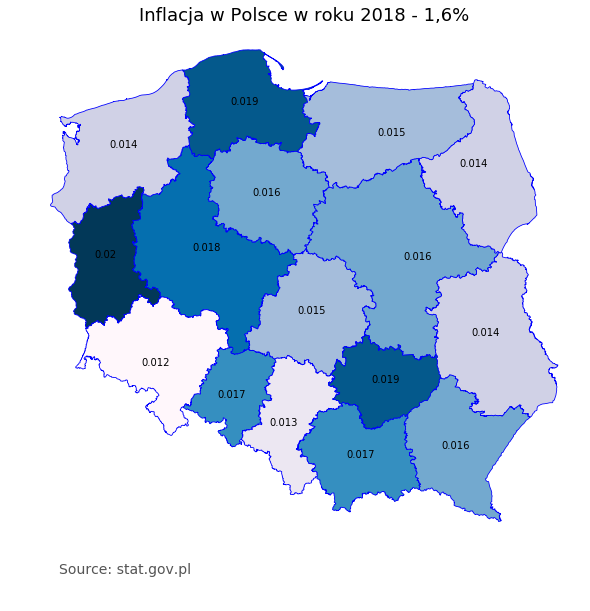

In [29]:
inflation_rate_map = inflation_rate[['Nazwa', '2018']]
inflation_rate_map = inflation_rate_map.rename(columns = {'2018' : 'inflation'})

combined_data_inf = poland_data.merge(inflation_rate_map, on = 'Nazwa')      
combined_data_inf = combined_data_inf[['Nazwa', 'geometry', 'inflation']]
    
combined_data_inf = combined_data_inf.to_crs(epsg=2180)
fig, ax = plt.subplots(1, figsize = (10,10))

title = 'Inflacja w Polsce w roku 2018 - 1,6%'
ax.set_title(title, fontdict={'fontsize': '18', 'fontweight' : '6'})

ax.annotate('Source: stat.gov.pl',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=14 ,color='#555555')

combined_data_inf.plot(cmap = 'PuBu', column = 'inflation', ax = ax, linewidth=0.8, edgecolor='blue',
                       figsize = (10,10))
ax.axis('off') 

combined_data_inf['coords'] = combined_data_inf['geometry'].apply(lambda x: x.representative_point().coords[:])
combined_data_inf['coords'] = [coords[0] for coords in combined_data_inf['coords']]
for idx, row in combined_data_inf.iterrows():
    plt.annotate(s=row['inflation'], xy=row['coords'],horizontalalignment='center')


#### <b> Najwyższa inflacja w Polsce w roku 2018 to województwa:</b> 
* lubuskie
* pomorskie
* świętokrzyskie
<br><br>

<b>Najniższa zaś to województwa:</b> 
* dolnośląskie
* śląskie


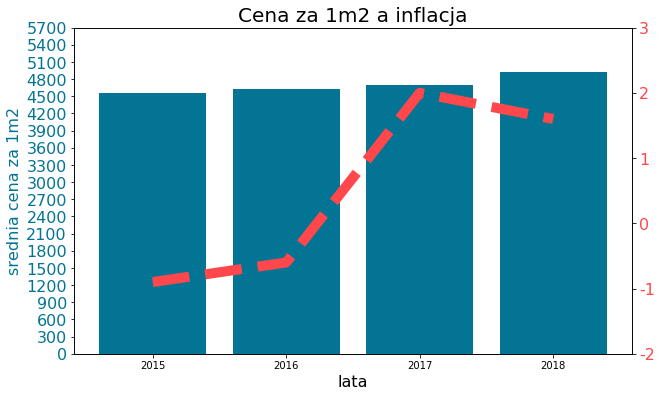

In [30]:
# graph prices flats per m2 vs inflation rate
inflation_rate_pl[['2015', '2016', '2017', '2018']] = inflation_rate_pl[['2015', '2016', '2017', '2018']].apply(lambda x : x*100)
prices_m2_pl_main
inflation_rate_pl = pd.melt(inflation_rate_pl)
inflation_rate_pl = inflation_rate_pl.rename(columns = {'variable' : 'rok', 'value' : 'inflation rate'})
inflation_rate_pl = inflation_rate_pl.drop(inflation_rate_pl.index[0])
inflation_rate_pl = inflation_rate_pl.apply(pd.to_numeric)

graf_m2_inflation = pd.merge(prices_m2_pl_main, inflation_rate_pl, how = 'left', on = 'rok')
graf_m2_inflation.index = graf_m2_inflation['rok']
graf_m2_inflation = graf_m2_inflation.apply(pd.to_numeric)

plt.figure(figsize = (10,6))
plt.xlabel('lata',color='black',fontsize=16)
plt.ylabel('srednia cena za 1m2', color='xkcd:sea blue', fontsize=16)
plt.title('Cena za 1m2 a inflacja', fontsize = 20)
ax1=plt.gca()
ax1.bar(graf_m2_inflation['rok'],graf_m2_inflation['avg price per m2'], color='xkcd:sea blue')
ax1.set_yticks(np.arange(0, 6000, 300))
ax1.set_yticklabels(np.arange(0, 6000, 300), color='xkcd:sea blue', fontsize = 16)
ax2=ax1.twinx()
ax2.plot(graf_m2_inflation['rok'],graf_m2_inflation['inflation rate'], color='xkcd:light red', linestyle='--', linewidth=10.0)
ax2.set_yticks(np.arange(-2, 4, 1))
ax2.set_yticklabels(np.arange(-2, 4, 1), color='xkcd:light red', fontsize = 16)
ax2.xaxis.set_ticks(graf_m2_inflation['rok'])

#### <b> Powyższy wykres pokazuje znaczący wzrost inflacji w roku 2017, a co za tym idzie wzrost cen za 1m2 mieszkań w 2018 roku.</b> <br><br>



#### <i> Bezrobocie </i> <br> <br> 

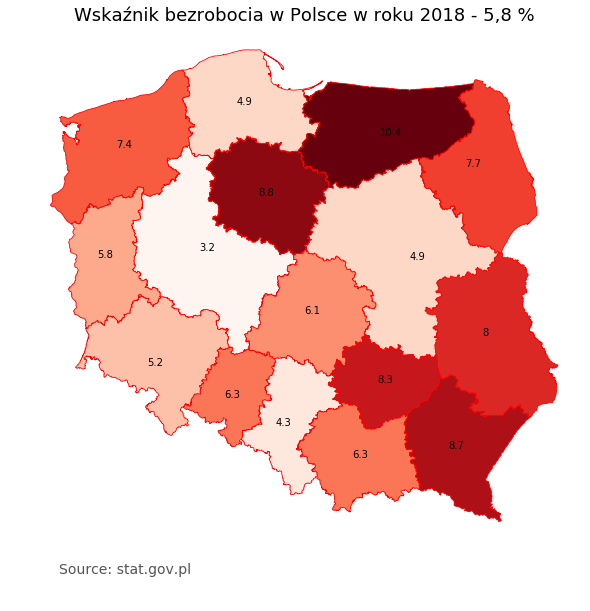

In [31]:
# unemployment rate
unemp_rate_map = unemp_rate[['Nazwa', '2018']]
unemp_rate_map = unemp_rate_map.rename(columns = {'2018' : 'unemployment_rate'})

combined_data_perm3 = poland_data.merge(unemp_rate_map, on = 'Nazwa')
combined_data_perm3 = combined_data_perm3[['Nazwa', 'geometry', 'unemployment_rate']]

combined_data_perm3 = combined_data_perm3.to_crs(epsg=2180)
fig, ax = plt.subplots(1, figsize = (10,10))

ax.annotate('Source: stat.gov.pl',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=14 ,color='#555555')

title = 'Wskaźnik bezrobocia w Polsce w roku 2018 - 5,8 %'
ax.set_title(title, fontdict={'fontsize': '18', 'fontweight' : '6'})

combined_data_perm3.plot(cmap = 'Reds', column = 'unemployment_rate', ax = ax, linewidth=0.8, edgecolor='red', 
                         figsize = (10,10))
ax.axis('off') 

combined_data_perm3['coords'] = combined_data_perm3['geometry'].apply(lambda x: x.representative_point().coords[:])
combined_data_perm3['coords'] = [coords[0] for coords in combined_data_perm3['coords']]
for idx, row in combined_data_perm3.iterrows():
    plt.annotate(s=row['unemployment_rate'], xy=row['coords'],horizontalalignment='center')


#### <b> Najwyższy poziom bezrobocia w Polsce w roku 2018 to województwa:</b> 
* warmińsko-mazurskie
* kujawsko-pomorskie
* podkarpackie
<br><br>

<b>Najniższy zaś to województwa:</b> 
* wielkopolskie <br> <br>

#### <i> Wynagrodzenia </i> <br> <br> 

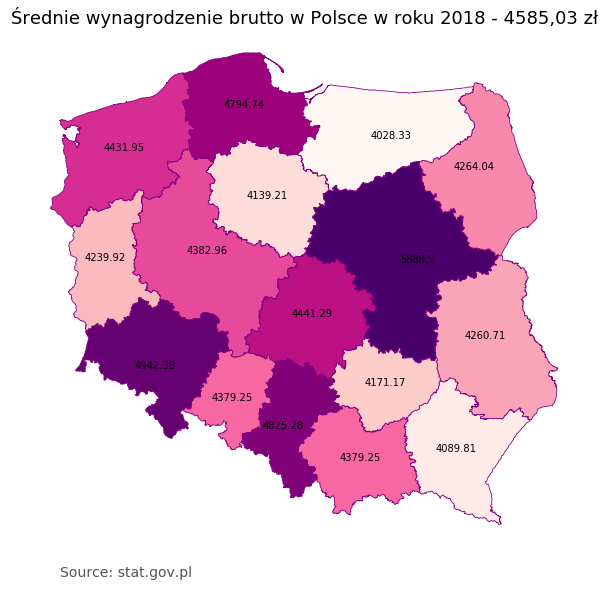

In [32]:
# salary
aver_salary_map = aver_salary[['Nazwa', '2018']]
aver_salary_map = aver_salary_map.rename(columns = {'2018' : 'aver_salary'})

combined_data_perm5 = poland_data.merge(aver_salary_map, on = 'Nazwa')
combined_data_perm5 = combined_data_perm5[['Nazwa', 'geometry', 'aver_salary']]

combined_data_perm5 = combined_data_perm5.to_crs(epsg=2180)
fig, ax = plt.subplots(1, figsize = (10,10))

ax.annotate('Source: stat.gov.pl',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=14 ,color='#555555')

title = 'Średnie wynagrodzenie brutto w Polsce w roku 2018 - 4585,03 zł'
ax.set_title(title, fontdict={'fontsize': '18', 'fontweight' : '6'})

combined_data_perm5.plot(cmap = 'RdPu', column = 'aver_salary', ax = ax, linewidth=0.8, edgecolor='purple', 
                         figsize = (10,10))
ax.axis('off') 

combined_data_perm5['coords'] = combined_data_perm5['geometry'].apply(lambda x: x.representative_point().coords[:])
combined_data_perm5['coords'] = [coords[0] for coords in combined_data_perm5['coords']]
for idx, row in combined_data_perm5.iterrows():
    plt.annotate(s=row['aver_salary'], xy=row['coords'],horizontalalignment='center')

#### <b> Najwyższy poziom wynagrodzeń w Polsce w roku 2018 to województwa:</b> 
* mazowieckie
* dolnośląskie
* śląskie
<br><br>

<b>Najniższy zaś to województwa:</b> 
* warmińsko-mazurskie
* podkarpackie <br> <br>

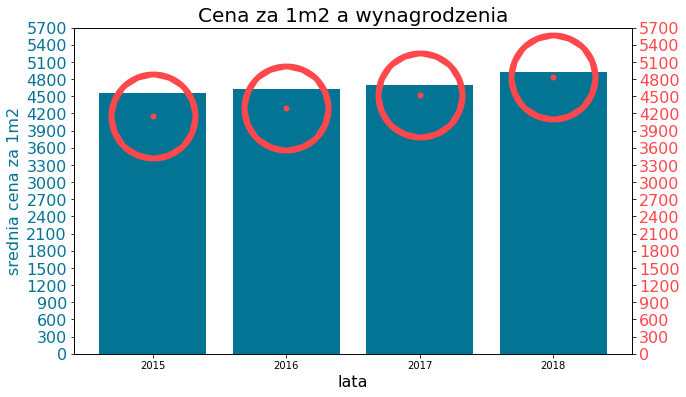

In [33]:
# graph prices flats per m2 vs salary
aver_salary_pl = pd.melt(aver_salary_pl)
aver_salary_pl = aver_salary_pl.rename(columns = {'variable' : 'rok', 'value' : 'avg salary'})
aver_salary_pl = aver_salary_pl.drop(aver_salary_pl.index[0])
aver_salary_pl = aver_salary_pl.apply(pd.to_numeric)
aver_salary_pl = aver_salary_pl[aver_salary_pl.rok >= 2015]
aver_salary_pl = aver_salary_pl.reset_index(drop=True)

prices_m2_pl_main

graf_m2_salary = pd.merge(prices_m2_pl_main, aver_salary_pl, how = 'left', on = 'rok')
graf_m2_salary.index = graf_m2_salary['rok']

plt.figure(figsize = (10,6))
plt.xlabel('lata',color='black',fontsize=16)
plt.ylabel('srednia cena za 1m2', color='xkcd:sea blue', fontsize=16)
plt.title('Cena za 1m2 a wynagrodzenia', fontsize = 20)
ax1=plt.gca()
ax1.bar(graf_m2_salary['rok'],graf_m2_salary['avg price per m2'], color='xkcd:sea blue')
ax1.set_yticks(np.arange(0, 6000, 300))
ax1.set_yticklabels(np.arange(0, 6000, 300), color='xkcd:sea blue', fontsize = 16)
ax2=ax1.twinx()
ax2.scatter(graf_m2_salary['rok'],graf_m2_salary['avg salary'], color='xkcd:light red', linestyle='-', linewidth=84.0)
ax2.set_yticks(np.arange(0, 6000, 300))
ax2.set_yticklabels(np.arange(0, 6000, 300), color='xkcd:light red', fontsize = 16)
ax2.xaxis.set_ticks(graf_m2_salary['rok'])

#### <b> Powyższy wykres pokazuje szybszy wzrost poziomu wynagrodzeń w porównaniu z średnią ceną za 1m2.</b> <br><br>